### <font color='blue'>Contexto</font> 

A pandemia de covid-19 causou a morte de quase 15 milhões de pessoas em todo o mundo, estima a Organização Mundial da Saúde (OMS). A OMS acredita que muitos países subestimaram os números de pessoas que morreram de covid — até o momento, apenas 5,4 milhões de óbitos foram oficialmente registrados. Esses cálculos também levam em consideração as mortes que não foram diretamente causadas pelo coronavírus, mas, sim, pelos efeitos indiretos da situação sanitária. É o caso, por exemplo, das pessoas que não conseguiram acessar hospitais para cuidar de outros problemas de saúde.
O estudo da OMS também leva em conta a má qualidade dos registros em algumas regiões ou países e falta de uma política de testagem, especialmente no início da crise lá em 2020. Considerando todas essas variáveis, a entidade concluiu que a maioria das 9,5 milhões de mortes extras (além das 5,4 milhões oficialmente registradas) podem ser consideradas diretamente causadas pelo vírus.



### <font color='blue'>Objectivo da Analise</font>

O objetivo desta análise é de usar o cojunto de dados históricos sobre a pandemia mantidos por Our World in Data ate 22/02/2022  para responder as seguintes perguntas:

1- Qual é  o continente que tem o maior numero de casos de Covid_19? Há diferenças discrepantes? 

2- Descreva as proporções dos novos casos de Covid 19 por Continente ao longo dos Anos?

3- Qual é o ano com maior número de casos de Covid-19?

4- Qual é o continente que tem o maior número de mortes por Covid_19? Há diferenças discrepantes?

5- Descreva as proporções das mortes por Covid 19 dentro dos Continentes ao longo dos Anos?

6- O que tem influenciado o aumento do número de mortes por covid 19 no Continente mas afectado pela pandemia?



### <font color='blue'>Descrição das Variaveis Usadas na Analise</font>

* **new_cases** -	Novos casos confirmados de COVID-19. As contagens podem incluir casos prováveis, quando relatados.

* **new_deaths** - Novas mortes atribuídas ao COVID-19. As contagens podem incluir mortes prováveis, quando relatadas.

* **icu_patients** - Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia.

* **hosp_patients** -	Número de pacientes com COVID-19 no hospital em um determinado dia.

* **new_tests** - Novos testes para COVID-19 (calculado apenas para dias consecutivos).

* **people_vaccinated** - Número total de pessoas que receberam pelo menos uma dose de vacina.

* **people_fully_vaccinated**	- Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial.

* **continent** - Continente da localização geográfica.

* **location** - Localização geográfica

* **date** -	Data da observação

* **population** - População (últimos valores disponíveis). 

* **median_age** - Idade média da população, projeção da ONU para 2020.

* **extreme_poverty** - Percentual da população que vive em extrema pobreza, ano mais recente disponível desde 2010.

* **cardiovasc_death_rate** - Taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas).

* **diabetes_prevalence** - Prevalência de diabetes (% da população de 20 a 79 anos) em 2017.

* **female_smokers** - Proporção de mulheres que fumam, ano mais recente disponível.

* **male_smokers** - Proporção de homens que fumam, ano mais recente disponível.

* **hospital_beds_per_thousand** - Camas hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010.

* **life_expectancy** -	Expectativa de vida ao nascer em 2019.

* **human_development_index** -Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um padrão de vida decente.


### <font color='blue'> Importando as bibliotecas que serão usadas na analise </font>

In [1]:
import numpy as np
import pandas as pd
#vislualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import missingno as mno
warnings.filterwarnings("ignore")
from scipy import stats

Parâmetros globais de configuração dos gráficos, para criar tdos os graficos com as mesmas dimensões

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

##  Carregando o Dataset 

In [3]:
dados = pd.read_csv('owid-covid-data.csv')

In [4]:
dados.shape

(163787, 67)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163787 entries, 0 to 163786
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    163787 non-null  object 
 1   continent                                   153974 non-null  object 
 2   location                                    163787 non-null  object 
 3   date                                        163787 non-null  object 
 4   total_cases                                 160782 non-null  float64
 5   new_cases                                   160752 non-null  float64
 6   new_cases_smoothed                          159601 non-null  float64
 7   total_deaths                                143041 non-null  float64
 8   new_deaths                                  143220 non-null  float64
 9   new_deaths_smoothed                         143090 non-null  float64
 

In [6]:
dados.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## Seleção das Colunas que serão usadas na Analise

In [7]:
    df = dados[['iso_code', 'continent', 'location', 'date', 'new_cases','new_deaths','icu_patients','hosp_patients','stringency_index','new_tests','people_vaccinated',
              'people_fully_vaccinated','population','median_age','gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
             'diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','human_development_index',
             'life_expectancy']]

In [8]:
df.shape

(163787, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163787 entries, 0 to 163786
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   iso_code                    163787 non-null  object 
 1   continent                   153974 non-null  object 
 2   location                    163787 non-null  object 
 3   date                        163787 non-null  object 
 4   new_cases                   160752 non-null  float64
 5   new_deaths                  143220 non-null  float64
 6   icu_patients                23028 non-null   float64
 7   hosp_patients               23792 non-null   float64
 8   stringency_index            128676 non-null  float64
 9   new_tests                   66435 non-null   float64
 10  people_vaccinated           41916 non-null   float64
 11  people_fully_vaccinated     39295 non-null   float64
 12  population                  162723 non-null  float64
 13  median_age    

Filtrando a coluna Continente removendo os campos com valores ausentes

In [10]:
df = df[df['continent'].notna()]

In [11]:
df.shape

(153974, 23)

In [12]:
df.isna().sum()

iso_code                           0
continent                          0
location                           0
date                               0
new_cases                       3035
new_deaths                     20554
icu_patients                  130946
hosp_patients                 130182
stringency_index               25298
new_tests                      87539
people_vaccinated             117099
people_fully_vaccinated       119558
population                       317
median_age                     18999
gdp_per_capita                 18344
extreme_poverty                64900
cardiovasc_death_rate          20041
diabetes_prevalence            12980
female_smokers                 50296
male_smokers                   51729
hospital_beds_per_thousand     32946
human_development_index        20566
life_expectancy                 1844
dtype: int64

Criando + 2 colunas

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['mounth'] = df['date'].dt.month_name()

In [15]:
df['year'] = df['date'].dt.year

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153974 entries, 0 to 163786
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    153974 non-null  object        
 1   continent                   153974 non-null  object        
 2   location                    153974 non-null  object        
 3   date                        153974 non-null  datetime64[ns]
 4   new_cases                   150939 non-null  float64       
 5   new_deaths                  133420 non-null  float64       
 6   icu_patients                23028 non-null   float64       
 7   hosp_patients               23792 non-null   float64       
 8   stringency_index            128676 non-null  float64       
 9   new_tests                   66435 non-null   float64       
 10  people_vaccinated           36875 non-null   float64       
 11  people_fully_vaccinated     34416 non-n

In [17]:
df.head(10)

,iso_code,continent,location,date,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,mounth,year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
1,AFG,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
2,AFG,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
3,AFG,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
4,AFG,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
5,AFG,Asia,Afghanistan,2020-02-29,0.0,NaN,NaN,NaN,8.33,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,February,2020
6,AFG,Asia,Afghanistan,2020-03-01,0.0,NaN,NaN,NaN,27.78,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,March,2020
7,AFG,Asia,Afghanistan,2020-03-02,0.0,NaN,NaN,NaN,27.78,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,March,2020
8,AFG,Asia,Afghanistan,2020-03-03,0.0,NaN,NaN,NaN,27.78,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,March,2020
9,AFG,Asia,Afghanistan,2020-03-04,0.0,NaN,NaN,NaN,27.78,NaN,...,NaN,597.029,9.59,NaN,NaN,0.5,0.511,64.83,March,2020


In [18]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy', 'mounth', 'year'],
      dtype='object')

In [19]:
df.shape

(153974, 25)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153974 entries, 0 to 163786
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    153974 non-null  object        
 1   continent                   153974 non-null  object        
 2   location                    153974 non-null  object        
 3   date                        153974 non-null  datetime64[ns]
 4   new_cases                   150939 non-null  float64       
 5   new_deaths                  133420 non-null  float64       
 6   icu_patients                23028 non-null   float64       
 7   hosp_patients               23792 non-null   float64       
 8   stringency_index            128676 non-null  float64       
 9   new_tests                   66435 non-null   float64       
 10  people_vaccinated           36875 non-null   float64       
 11  people_fully_vaccinated     34416 non-n

## <font color='blue'> Separação das Variáveis categóricas e numéricas </font>

Lista de colunas categóricas

In [21]:
cats = ['iso_code','continent','location']

Lista de colunas numéricas

In [22]:
nums =  ['new_cases','new_deaths','icu_patients','hosp_patients','stringency_index','new_tests','people_vaccinated',
        'people_fully_vaccinated','population','median_age','gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
        'diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','human_development_index',
        'life_expectancy']

##   <font color='blue'> Explorando as Variáveis Numéricas </font>

In [23]:
df[nums].describe()

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy
count,1.509390e+05,133420.000000,23028.000000,23792.00000,128676.000000,6.643500e+04,3.687500e+04,3.441600e+04,1.536570e+05,134975.000000,135630.000000,89074.000000,133933.000000,140994.000000,103678.000000,102245.000000,121028.000000,133408.000000,152130.000000
mean,2.825089e+03,44.066729,913.918404,4140.03001,54.652130,6.777668e+04,1.637700e+07,1.272285e+07,3.792979e+07,30.569465,19674.384606,13.605416,260.324347,8.207723,10.658944,32.763229,3.030277,0.725564,73.582253
std,1.779699e+04,195.542817,2698.310262,11780.13702,20.423222,2.160539e+05,6.547019e+07,5.100509e+07,1.455752e+08,9.127872,20704.756088,20.102616,120.168156,4.505739,10.592278,13.571551,2.458134,0.150397,7.510735
min,-7.434700e+04,-3933.000000,0.000000,0.00000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,4.700000e+01,15.100000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,0.100000,0.394000,53.280000
25%,0.000000e+00,0.000000,28.000000,124.00000,40.740000,2.460000e+03,2.932490e+05,2.036755e+05,8.960050e+05,22.200000,4449.898000,0.600000,168.711000,5.310000,1.900000,21.600000,1.300000,0.602000,69.020000
50%,6.000000e+01,1.000000,152.000000,666.00000,54.630000,9.583000e+03,1.898729e+06,1.454122e+06,6.896655e+06,29.700000,12951.839000,2.200000,243.811000,7.170000,6.300000,31.400000,2.397000,0.744000,75.050000
75%,7.510000e+02,13.000000,608.000000,2631.00000,70.830000,3.852600e+04,8.325492e+06,6.679070e+06,2.705363e+07,39.100000,27936.896000,21.400000,331.430000,10.430000,19.300000,41.300000,4.000000,0.845000,78.950000
max,1.368120e+06,4614.000000,28891.000000,154536.00000,100.000000,3.740296e+06,1.266426e+09,1.228340e+09,1.444216e+09,48.200000,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,13.800000,0.957000,86.750000


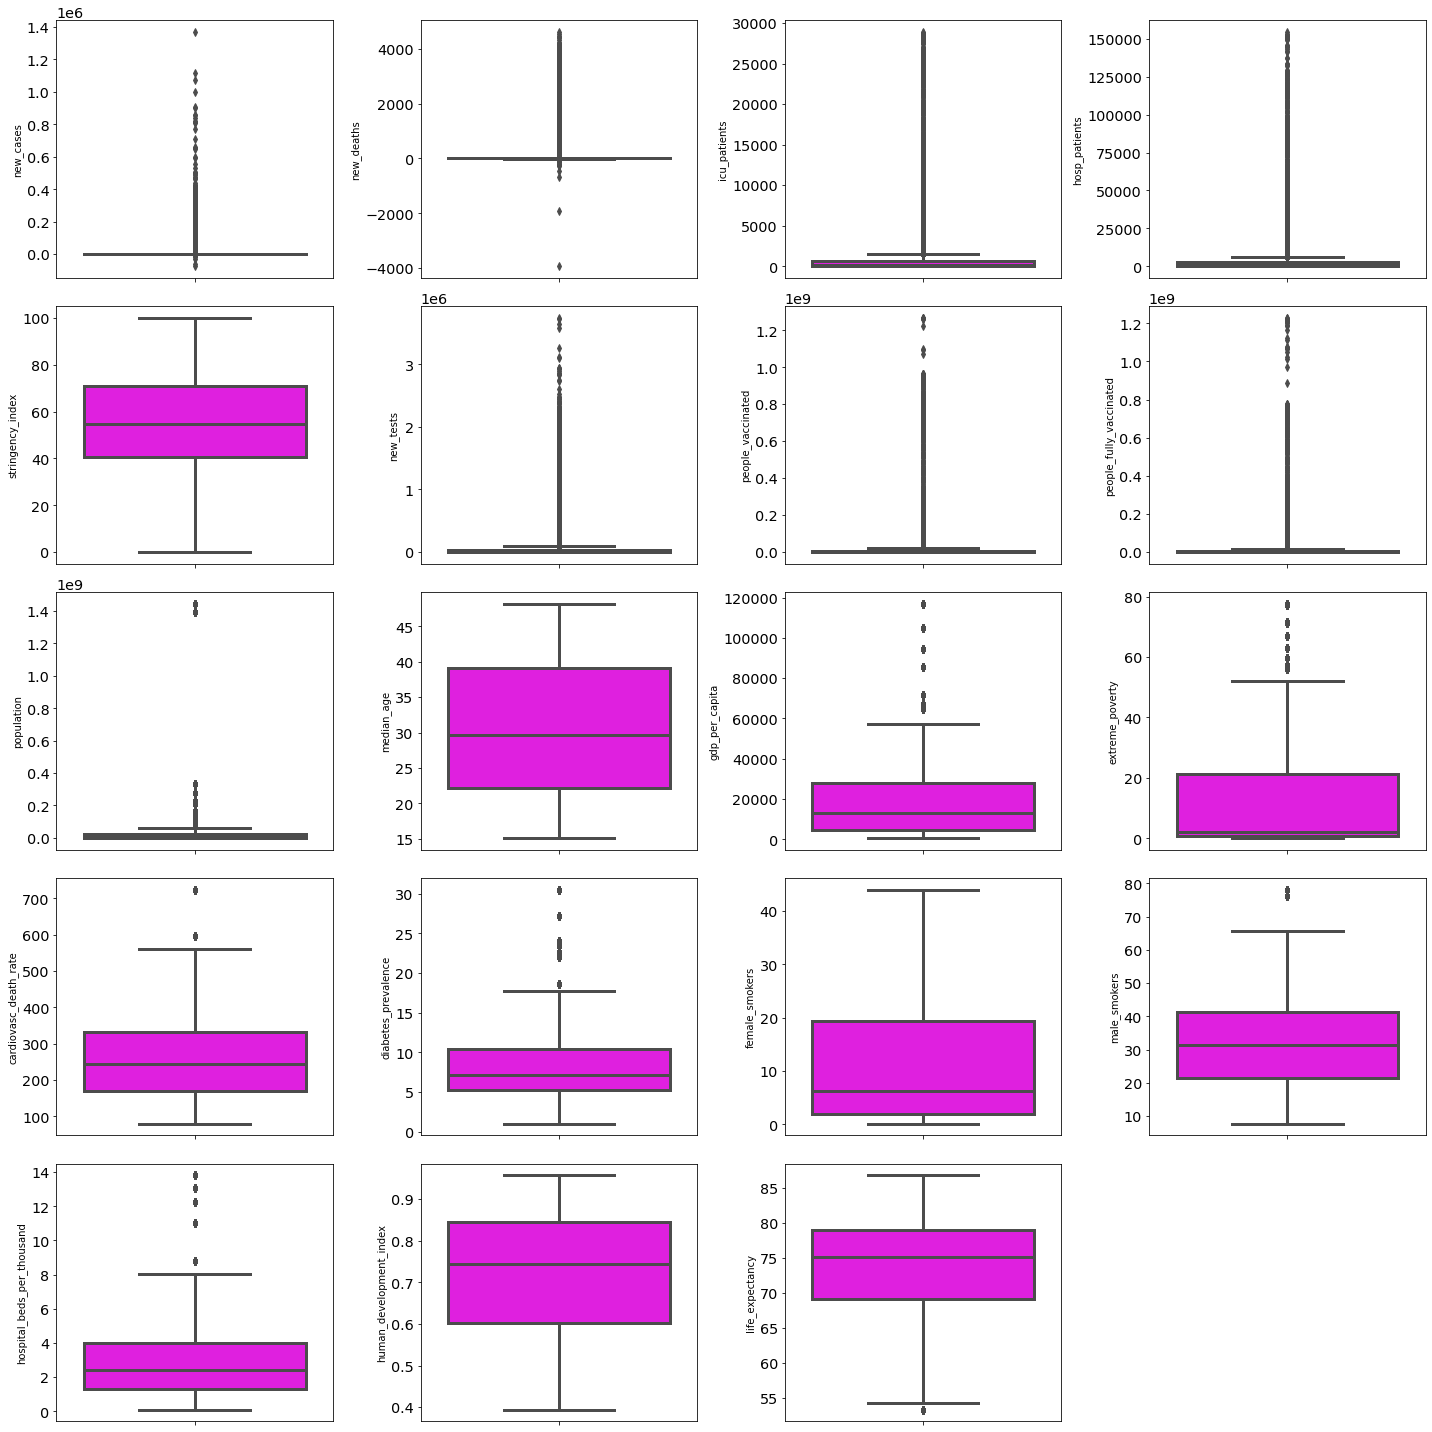

In [24]:
features = nums
plt.figure(figsize = (20, 20))
for i in range(0, len(features)):
    plt.subplot(5, len(features)/4, i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

##    A partir dos gráficos pode-se observar que: 

* Todas Variáveis Numéricas contem um elevado número de Outliers ou seja valores que estão muito acima da Media
* A causa, mas provável desse elevado número de outliers e que os valores existentes nas colunas variam muito de pais para pais.

##  Análise Bivariada - Mapa de Correlação

In [25]:
corr_df = df[nums].corr()

In [26]:
corr_df

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy
new_cases,1.000000,0.607376,0.642269,0.724109,0.062411,0.656883,0.318813,0.307388,0.234207,0.113034,0.084680,-0.083032,-0.086898,0.001875,0.092542,-0.035371,0.032205,0.122295,0.079515
new_deaths,0.607376,1.000000,0.850836,0.858042,0.127738,0.597282,0.275235,0.220568,0.297858,0.113491,0.062473,-0.114903,-0.076672,0.027375,0.076318,-0.032789,0.015492,0.124333,0.077695
icu_patients,0.642269,0.850836,1.000000,0.961366,0.177066,0.722711,0.672784,0.639630,0.836223,-0.060628,0.053004,0.062769,-0.060013,0.164970,0.048294,-0.089682,-0.052846,0.060743,-0.098358
hosp_patients,0.724109,0.858042,0.961366,1.000000,0.190244,0.735802,0.667713,0.643304,0.808435,-0.017646,0.025733,0.135765,-0.064172,0.153874,0.022637,-0.062048,-0.057660,0.020040,-0.046751
stringency_index,0.062411,0.127738,0.177066,0.190244,1.000000,0.062100,0.052718,0.045103,0.103543,0.091380,0.020726,-0.225074,-0.082642,0.084656,-0.047782,0.026413,-0.020351,0.152804,0.126413
new_tests,0.656883,0.597282,0.722711,0.735802,0.062100,1.000000,0.599745,0.565331,0.593315,0.114307,0.146720,-0.060297,-0.081832,0.081841,0.082161,-0.051228,-0.014141,0.133091,0.094658
people_vaccinated,0.318813,0.275235,0.672784,0.667713,0.052718,0.599745,1.000000,0.950489,0.777808,-0.016655,-0.038399,0.048286,-0.010677,0.070498,-0.087152,-0.068105,-0.084838,-0.042015,-0.045642
people_fully_vaccinated,0.307388,0.220568,0.639630,0.643304,0.045103,0.565331,0.950489,1.000000,0.676595,0.003460,-0.012413,0.022316,-0.027367,0.063362,-0.069241,-0.044776,-0.047833,-0.016620,-0.021936
population,0.234207,0.297858,0.836223,0.808435,0.103543,0.593315,0.777808,0.676595,1.000000,0.028820,-0.057161,-0.037268,-0.000550,0.013824,-0.124613,0.026194,-0.038999,-0.019270,-0.027248
median_age,0.113034,0.113491,-0.060628,-0.017646,0.091380,0.114307,-0.016655,0.003460,0.028820,1.000000,0.638929,-0.697849,-0.338572,0.155653,0.658501,0.188310,0.658658,0.898903,0.848006


## A partir do *mapa de correlação* acima, pode-se ver que:

* Há uma forte correlação positiva entre `novos casos` e `total casos` oque indica o multicoliniedade (2 variáveis que contem a mesma informação)

## <font color='blue'> Explorando as Variáveis Categóricas </font>

In [27]:
df[cats].describe()

,iso_code,continent,location
count,153974,153974,153974
unique,225,6,225
top,MEX,Africa,Mexico
freq,784,38812,784


## Algumas observações:

    *Para a variável Continente Africa é a classe dominante.
    *Para a variável de Location Taiwan é a classe dominante.
    *Todos os valores únicos para cada categoria estão em torno de 6-215 valores únicos

# <font color='blue'> Respondendo as Perguntas </font>

## <font color='blue'> 1- Qual é  o continente que tem o maior numero de casos de Covid_19? Há diferenças discrepantes? </font>

Agrupando os dados para análise

In [28]:
df_report1 = df.groupby(['continent'])['new_cases'].sum().reset_index()
df_report1.head()

,continent,new_cases
0,Africa,11168899.0
1,Asia,112796185.0
2,Europe,153250440.0
3,North America,92469987.0
4,Oceania,3363795.0


Ajustando os nomes das colunas

In [29]:
df_report1.columns = ['Continente', 'Total']
df_report1.head()

,Continente,Total
0,Africa,11168899.0
1,Asia,112796185.0
2,Europe,153250440.0
3,North America,92469987.0
4,Oceania,3363795.0


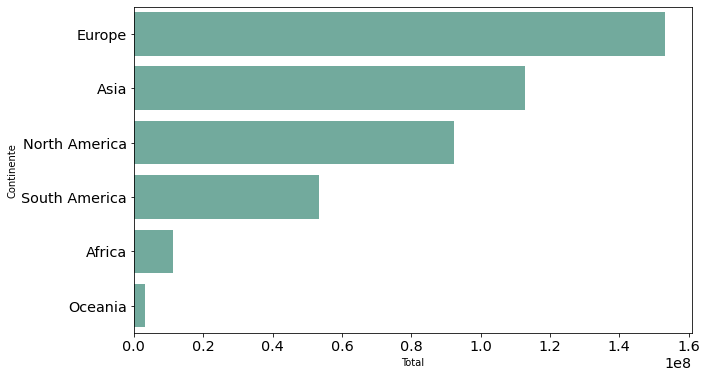

In [30]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Reorder this data frame
dfplot = df_report1.sort_values(['Total'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    y="Continente", 
     x="Total", 
    data=dfplot, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

## A partir do gráfico pode-se observar que:

* O continente Europeu apresenta o maior número de casos de covid_19, comparando com os outros continentes fica evidente que as diferenças são altas.

## <font color='blue'> 2- Descreva as proporções dos novos casos de Covid 19 por Continente ao longo dos Anos? </font>

In [31]:
df_report3 = df.groupby(['year','continent'])['new_cases'].sum().reset_index()
df_report3

,year,continent,new_cases
0,2020,Africa,2760454.0
1,2020,Asia,19892098.0
2,2020,Europe,23927287.0
3,2020,North America,23175122.0
4,2020,Oceania,48408.0
5,2020,South America,13199247.0
6,2021,Africa,6977128.0
7,2021,Asia,64207827.0
8,2021,Europe,65116826.0
9,2021,North America,41804642.0


In [32]:
df_report3a = df.groupby(['continent'])['new_cases'].sum().reset_index()
df_report3a

,continent,new_cases
0,Africa,11168899.0
1,Asia,112796185.0
2,Europe,153250440.0
3,North America,92469987.0
4,Oceania,3363795.0
5,South America,53366799.0


In [33]:
df_reportdf = df_report3.merge(df_report3a, on = 'continent')
df_reportdf

,year,continent,new_cases_x,new_cases_y
0,2020,Africa,2760454.0,11168899.0
1,2021,Africa,6977128.0,11168899.0
2,2022,Africa,1431317.0,11168899.0
3,2020,Asia,19892098.0,112796185.0
4,2021,Asia,64207827.0,112796185.0
5,2022,Asia,28696260.0,112796185.0
6,2020,Europe,23927287.0,153250440.0
7,2021,Europe,65116826.0,153250440.0
8,2022,Europe,64206327.0,153250440.0
9,2020,North America,23175122.0,92469987.0


In [34]:
df_reportdf['Percentual(%)'] = df_reportdf['new_cases_x'] / df_reportdf['new_cases_y'] * 100
df_reportdf.columns = ['Ano', 
                      'Continente', 
                      'Casos por Ano', 
                      'Total Casos', 
                      'Percentual(%)']
df_reportdf

,Ano,Continente,Casos por Ano,Total Casos,Percentual(%)
0,2020,Africa,2760454.0,11168899.0,24.715543
1,2021,Africa,6977128.0,11168899.0,62.469255
2,2022,Africa,1431317.0,11168899.0,12.815202
3,2020,Asia,19892098.0,112796185.0,17.635435
4,2021,Asia,64207827.0,112796185.0,56.923758
5,2022,Asia,28696260.0,112796185.0,25.440807
6,2020,Europe,23927287.0,153250440.0,15.613193
7,2021,Europe,65116826.0,153250440.0,42.490466
8,2022,Europe,64206327.0,153250440.0,41.896341
9,2020,North America,23175122.0,92469987.0,25.062318


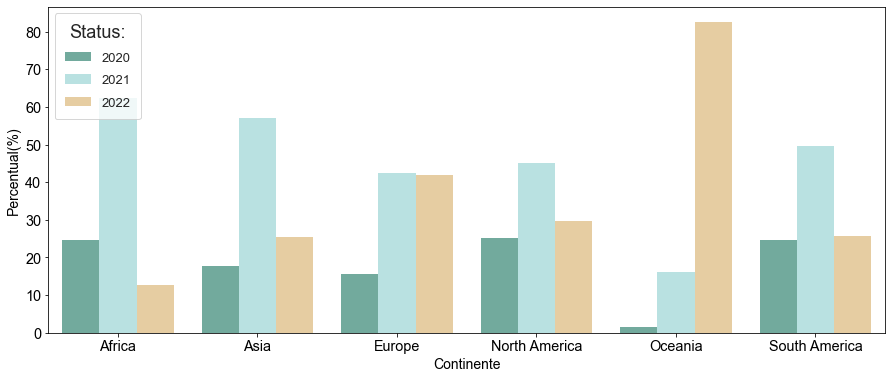

In [35]:
plt.figure(figsize = (15,6))
chart = sns.barplot(x = 'Continente', 
                    y = 'Percentual(%)', 
                    data = df_reportdf, 
                    hue = 'Ano',
                    palette = ["#69b3a2","#B2E7E8",'#F2D096'])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Continente", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 13, 
           title = 'Status:')


## A partir do gráfico pode-se observar que:

* O ano de 2021 apresenta o maior numero de novos casos do covid-19 comparando com os outros anos, com exceção da Oceânia que teve o pico de novos casos de covid 19 em 2022.

## <font color='blue'> 3- Qual é o ano com maior número de casos de Covid-19? </font>

In [36]:
df_report2 = df.groupby(['year'])['new_cases'].sum().reset_index()
df_report2.head()

,year,new_cases
0,2020,83002616.0
1,2021,205095114.0
2,2022,138318375.0


In [37]:
df_report2.columns = ['Ano', 'Total']
df_report2.head()

,Ano,Total
0,2020,83002616.0
1,2021,205095114.0
2,2022,138318375.0


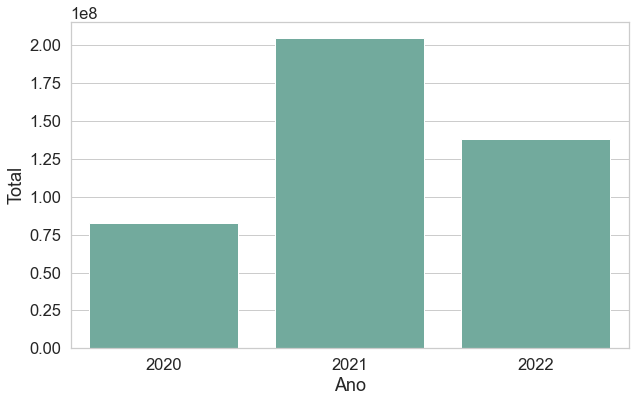

In [38]:
plt.figure(figsize=(10, 6))


dfplt2 = df_report2.sort_values(['Total'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    y="Total", 
     x="Ano", 
    data=dfplt2, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

## <font color='blue'> 4- Qual é o continente que tem o maior número de mortes por Covid_19? Há diferenças discrepantes? </font>

In [39]:
df_report4 = df.groupby(['continent'])['new_deaths'].sum().reset_index()
df_report4.head()

,continent,new_deaths
0,Africa,246875.0
1,Asia,1334821.0
2,Europe,1693983.0
3,North America,1357912.0
4,Oceania,7577.0


In [40]:
df_report4.columns = ['Continente', 'Total']
df_report4.head()

,Continente,Total
0,Africa,246875.0
1,Asia,1334821.0
2,Europe,1693983.0
3,North America,1357912.0
4,Oceania,7577.0


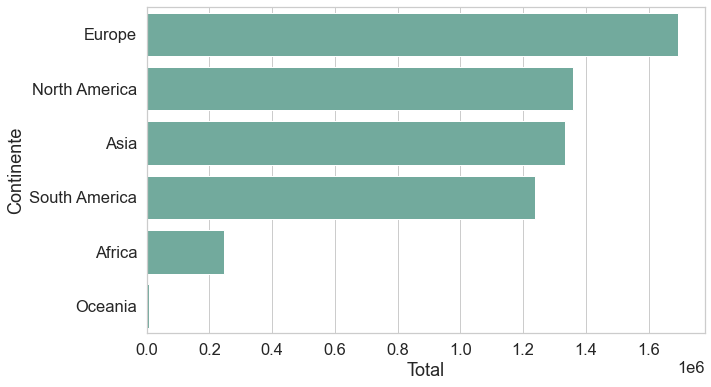

In [41]:
plt.figure(figsize=(10, 6))


dfplot3 = df_report4.sort_values(['Total'], ascending=False).reset_index(drop=True)


sns.barplot(
    y="Continente", 
     x="Total", 
    data=dfplot3, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

## A partir do gráfico pode-se observar que:

* O continente Europeu apresenta o maior número de mortes de covid_19, comparando com os outros continentes fica evidente que as diferenças são altas. A partir desta analise podemos identificar uma correlação positiva entre o numero de novos casos e o numero de mortes ou seja a medida que os casos de covid aumentam as mortes tambem tendem a aumentar. 

## <font color='blue'> 5- Descreva as proporções das mortes por Covid 19 dentro dos Continentes ao longo dos Anos? </font>

In [42]:
df_report5 = df.groupby(['year','continent'])['new_deaths'].sum().reset_index()
df_report5

,year,continent,new_deaths
0,2020,Africa,65468.0
1,2020,Asia,337835.0
2,2020,Europe,545550.0
3,2020,North America,512685.0
4,2020,Oceania,1059.0
5,2020,South America,414312.0
6,2021,Africa,162985.0
7,2021,Asia,914438.0
8,2021,Europe,984465.0
9,2021,North America,707618.0


In [43]:
df_report5a = df.groupby(['continent'])['new_deaths'].sum().reset_index()
df_report5a

,continent,new_deaths
0,Africa,246875.0
1,Asia,1334821.0
2,Europe,1693983.0
3,North America,1357912.0
4,Oceania,7577.0
5,South America,1238215.0


In [44]:
df_reportdf1 = df_report5.merge(df_report5a, on = 'continent')
df_reportdf1

,year,continent,new_deaths_x,new_deaths_y
0,2020,Africa,65468.0,246875.0
1,2021,Africa,162985.0,246875.0
2,2022,Africa,18422.0,246875.0
3,2020,Asia,337835.0,1334821.0
4,2021,Asia,914438.0,1334821.0
5,2022,Asia,82548.0,1334821.0
6,2020,Europe,545550.0,1693983.0
7,2021,Europe,984465.0,1693983.0
8,2022,Europe,163968.0,1693983.0
9,2020,North America,512685.0,1357912.0


In [45]:
df_reportdf1['Percentual(%)'] = df_reportdf1['new_deaths_x'] / df_reportdf1['new_deaths_y'] * 100
df_reportdf1.columns = ['Ano', 
                      'Continente', 
                      'Mortes por Ano', 
                      'Total Mortes', 
                      'Percentual(%)']
df_reportdf1

,Ano,Continente,Mortes por Ano,Total Mortes,Percentual(%)
0,2020,Africa,65468.0,246875.0,26.518684
1,2021,Africa,162985.0,246875.0,66.019241
2,2022,Africa,18422.0,246875.0,7.462076
3,2020,Asia,337835.0,1334821.0,25.309386
4,2021,Asia,914438.0,1334821.0,68.506414
5,2022,Asia,82548.0,1334821.0,6.184200
6,2020,Europe,545550.0,1693983.0,32.205164
7,2021,Europe,984465.0,1693983.0,58.115400
8,2022,Europe,163968.0,1693983.0,9.679436
9,2020,North America,512685.0,1357912.0,37.755392


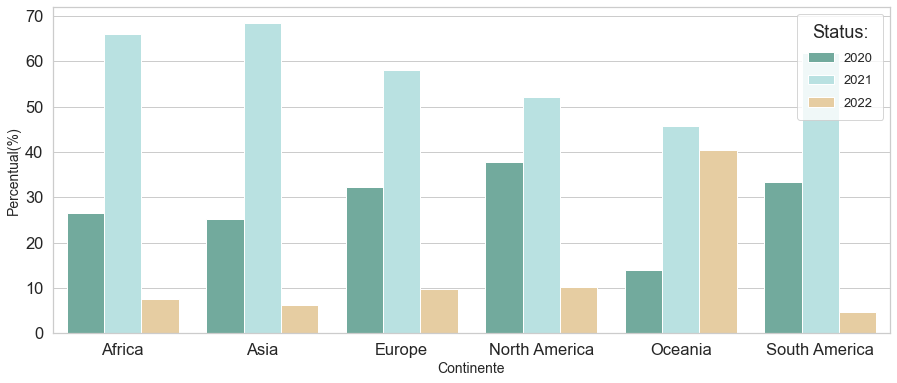

In [46]:
plt.figure(figsize = (15,6))
chart = sns.barplot(x = 'Continente', 
                    y = 'Percentual(%)', 
                    data = df_reportdf1, 
                    hue = 'Ano',
                    palette = ["#69b3a2","#B2E7E8",'#F2D096'])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Continente", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 13, 
           title = 'Status:')


## A partir do gráfico pode-se observar que:

* O ano de 2021 apresenta o maior numero de mortes casos do covid-19 comparando com os outros anos.

## <font color='red'> Observação </font>


Apartir das analises feitas acima, pode-se observar que o continente europeu apresenta o maior numero de casos covid 19 
e tambem o maior numero de mortes causadas pelo covid. Dai que surge a seguinte pergunta:


## <font color='blue'> 6- O que tem influenciado o aumento do número de mortes por covid 19 no Continente Europeu? </font>

Filtra o dataframe contendo somente os registos da Europa

In [47]:
dfeurope = df[(df.continent == 'Europe')]

In [48]:
dfeurope.shape

(36528, 25)

Verificando o numero total de valores ausentes

In [49]:
dfeurope.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
new_cases                       862
new_deaths                     3064
icu_patients                  20320
hosp_patients                 17215
stringency_index               4478
new_tests                     12520
people_vaccinated             23566
people_fully_vaccinated       23856
population                        0
median_age                     7202
gdp_per_capita                 5766
extreme_poverty               14590
cardiovasc_death_rate          6479
diabetes_prevalence            4308
female_smokers                 7207
male_smokers                   7207
hospital_beds_per_thousand     5031
human_development_index        5758
life_expectancy                1442
mounth                            0
year                              0
dtype: int64

<AxesSubplot:>

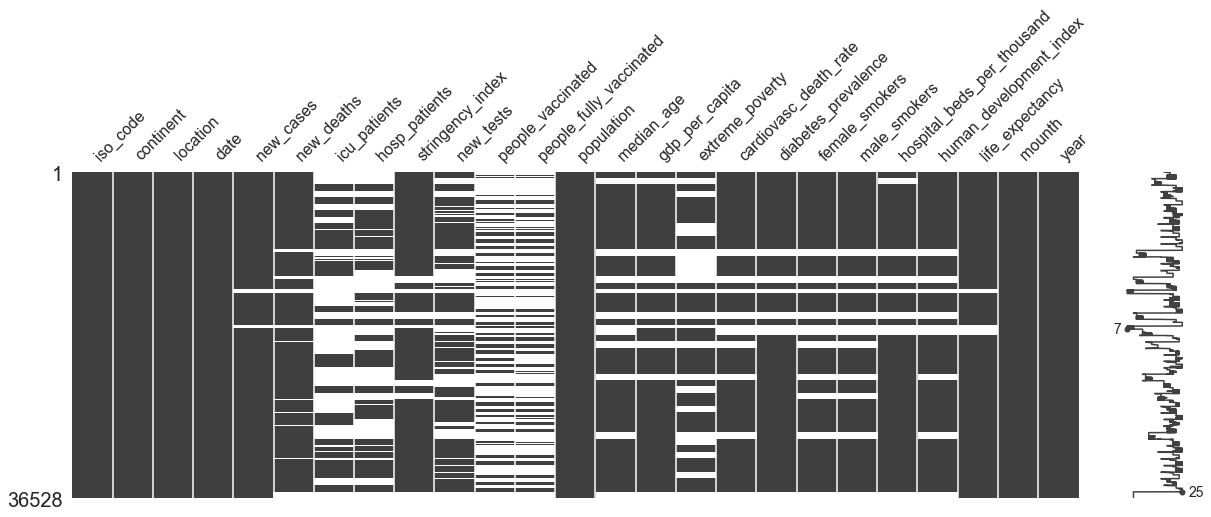

In [50]:
mno.matrix(dfeurope, figsize = (20, 6))

## <font color='blue'> Aplicando as varias técnicas de imputação de substituição dos valores ausentes </font>

Aplicando o filtro na variavel 'new_deaths' removendo os valores Ausentes

In [51]:
dfeurope = dfeurope[dfeurope['new_deaths'].notna()]

In [52]:
dfeurope.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
new_cases                         7
new_deaths                        0
icu_patients                  17383
hosp_patients                 14331
stringency_index               2731
new_tests                      9745
people_vaccinated             20596
people_fully_vaccinated       20887
population                        0
median_age                     5091
gdp_per_capita                 3664
extreme_poverty               12224
cardiovasc_death_rate          4388
diabetes_prevalence            2277
female_smokers                 5091
male_smokers                   5091
hospital_beds_per_thousand     2980
human_development_index        3698
life_expectancy                 702
mounth                            0
year                              0
dtype: int64

Aplicando o filtro na variavel 'icu_patients' buscando os valores NA

In [53]:
icu_patients = dfeurope[dfeurope['icu_patients'].isna()]

In [54]:
icu_patients.shape

(17383, 25)

verificando o ano que tem o maior numero de valores ausentes

In [55]:
icu_patients['year'].value_counts()

2021    8871
2020    7070
2022    1442
Name: year, dtype: int64

Verificando o numero de valores ausentes por pais

In [56]:
icu_patients['location'].value_counts()

San Marino                725
Albania                   714
Greece                    714
Poland                    713
Ukraine                   712
Norway                    711
Hungary                   710
Russia                    706
Croatia                   706
Moldova                   706
Bosnia and Herzegovina    704
Iceland                   704
North Macedonia           703
Andorra                   703
Montenegro                702
Kosovo                    702
Lithuania                 701
Monaco                    696
Belarus                   694
Isle of Man               693
Latvia                    691
Liechtenstein             690
Gibraltar                 469
Faeroe Islands            413
Slovakia                  254
Finland                   192
Spain                     152
Romania                    75
Malta                      68
Bulgaria                   35
Estonia                    33
France                     32
United Kingdom             28
Ireland   

 Aplicando a técnica de imputação de substituição dos valores ausentes por zero

In [57]:
dfeurope['icu_patients'] = dfeurope['icu_patients'].fillna(0)
dfeurope['hosp_patients'] = dfeurope['hosp_patients'].fillna(0)
dfeurope['new_tests'] = dfeurope['new_tests'].fillna(0)
dfeurope['new_cases'] = dfeurope['new_cases'].fillna(0)
dfeurope['people_vaccinated'] = dfeurope['people_vaccinated'].fillna(0)
dfeurope['people_fully_vaccinated'] = dfeurope['people_fully_vaccinated'].fillna(0)

Aplicando o filtro na variavel 'median_age' buscando os valores Ausentes

In [58]:
median_age = dfeurope[dfeurope['median_age'].isna()]

verificando o numero de valores ausentes por pais

In [59]:
median_age['location'].value_counts()

San Marino        725
Andorra           703
Kosovo            702
Monaco            696
Isle of Man       693
Liechtenstein     690
Gibraltar         469
Faeroe Islands    413
Name: location, dtype: int64

Aplicando a técnica de imputação de substituição dos valores ausentes pelo valor real da idade media por pais

In [60]:
dfeurope.loc[dfeurope['location'] == 'San Marino', 'median_age'] = 45
dfeurope.loc[dfeurope['location'] == 'Andorra', 'median_age'] = 46
dfeurope.loc[dfeurope['location'] == 'Kosovo', 'median_age'] = 30
dfeurope.loc[dfeurope['location'] == 'Monaco', 'median_age'] = 53
dfeurope.loc[dfeurope['location'] == 'Isle of Man', 'median_age'] = 43
dfeurope.loc[dfeurope['location'] == 'Gibraltar', 'median_age'] = 33
dfeurope.loc[dfeurope['location'] == 'Faeroe Islands', 'median_age'] = 37
dfeurope.loc[dfeurope['location'] == 'Liechtenstein', 'median_age'] = 43

In [61]:
dfeurope.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
new_cases                         0
new_deaths                        0
icu_patients                      0
hosp_patients                     0
stringency_index               2731
new_tests                         0
people_vaccinated                 0
people_fully_vaccinated           0
population                        0
median_age                        0
gdp_per_capita                 3664
extreme_poverty               12224
cardiovasc_death_rate          4388
diabetes_prevalence            2277
female_smokers                 5091
male_smokers                   5091
hospital_beds_per_thousand     2980
human_development_index        3698
life_expectancy                 702
mounth                            0
year                              0
dtype: int64

In [62]:
gdp_per_capita = dfeurope[dfeurope['gdp_per_capita'].isna()]

Verificando o numero de valores ausentes por pais

In [63]:
gdp_per_capita['location'].value_counts()

Andorra           703
Monaco            696
Isle of Man       693
Liechtenstein     690
Gibraltar         469
Faeroe Islands    413
Name: location, dtype: int64

Aplicando a técnica de imputação de substituição dos valores ausentes pelo valor real das gdp per capita

In [64]:
dfeurope.loc[dfeurope['location'] == 'Andorra', 'gdp_per_capita'] = 40897
dfeurope.loc[dfeurope['location'] == 'Monaco', 'gdp_per_capita'] = 190512
dfeurope.loc[dfeurope['location'] == 'Isle of Man', 'gdp_per_capita'] = 89112
dfeurope.loc[dfeurope['location'] == 'Liechtenstein', 'gdp_per_capita'] = 180366
dfeurope.loc[dfeurope['location'] == 'Gibraltar', 'gdp_per_capita'] = 92843
dfeurope.loc[dfeurope['location'] == 'Faeroe Islands', 'gdp_per_capita'] = 64225

In [65]:
dfeurope.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
new_cases                         0
new_deaths                        0
icu_patients                      0
hosp_patients                     0
stringency_index               2731
new_tests                         0
people_vaccinated                 0
people_fully_vaccinated           0
population                        0
median_age                        0
gdp_per_capita                    0
extreme_poverty               12224
cardiovasc_death_rate          4388
diabetes_prevalence            2277
female_smokers                 5091
male_smokers                   5091
hospital_beds_per_thousand     2980
human_development_index        3698
life_expectancy                 702
mounth                            0
year                              0
dtype: int64

Analisando as medias das variaveis

In [66]:
dfeurope.describe()

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,year
count,33464.000000,33464.000000,33464.000000,33464.000000,30733.000000,3.346400e+04,3.346400e+04,3.346400e+04,3.346400e+04,33464.000000,33464.000000,21240.000000,29076.000000,31187.000000,28373.000000,28373.000000,30484.000000,29766.000000,32762.000000,33464.000000
mean,4575.153060,50.621055,254.590396,1693.336421,53.739280,5.336600e+04,3.168993e+06,2.654365e+06,1.605334e+07,42.047992,42264.499313,0.903362,229.369877,6.549469,23.406207,35.542586,5.155817,0.880117,79.886764,2020.675203
std,18073.684345,140.976838,720.417050,4736.246361,16.396363,1.594842e+05,1.036603e+07,9.059426e+06,2.792702e+07,3.633179,35915.237002,1.274332,124.925340,1.988351,7.586083,10.523102,2.369142,0.056579,3.511886,0.609245
min,-74347.000000,-3933.000000,0.000000,0.000000,5.560000,0.000000e+00,0.000000e+00,0.000000e+00,3.369100e+04,30.000000,5189.972000,0.100000,86.060000,3.280000,5.900000,15.200000,2.220000,0.750000,71.900000,2020.000000
25%,36.000000,0.000000,0.000000,0.000000,41.670000,0.000000e+00,0.000000e+00,0.000000e+00,1.325188e+06,39.700000,23313.199000,0.200000,122.137000,4.910000,19.600000,27.300000,3.320000,0.829000,76.880000,2020.000000
50%,402.000000,5.000000,0.000000,39.000000,51.850000,4.986000e+03,0.000000e+00,0.000000e+00,5.465629e+06,42.500000,32605.906000,0.500000,168.711000,5.810000,23.000000,34.800000,4.510000,0.892000,81.320000,2021.000000
75%,2268.250000,30.000000,119.000000,843.250000,65.740000,2.861250e+04,5.691608e+05,4.407318e+05,1.072455e+07,44.000000,46682.515000,1.000000,329.635000,7.770000,28.400000,44.400000,6.620000,0.931000,82.400000,2021.000000
max,502507.000000,4614.000000,7019.000000,39255.000000,100.000000,2.945871e+06,7.828428e+07,7.160191e+07,1.459120e+08,53.000000,190512.000000,5.700000,539.849000,10.080000,44.000000,58.300000,13.800000,0.957000,86.750000,2022.000000


Aplicando a técnica de imputação de substituição dos valores ausentes pelas medias de cada variável

In [67]:
dfeurope['extreme_poverty'] = dfeurope['extreme_poverty'].fillna(0.90)
dfeurope['cardiovasc_death_rate'] = dfeurope['cardiovasc_death_rate'].fillna(229)
dfeurope['diabetes_prevalence'] = dfeurope['diabetes_prevalence'].fillna(6.5)
dfeurope['female_smokers'] = dfeurope['female_smokers'].fillna(23)
dfeurope['male_smokers'] = dfeurope['male_smokers'].fillna(35)
dfeurope['hospital_beds_per_thousand'] = dfeurope['hospital_beds_per_thousand'].fillna(5)
dfeurope['human_development_index'] = dfeurope['human_development_index'].fillna(0.8)
dfeurope['life_expectancy'] = dfeurope['life_expectancy'].fillna(79)
dfeurope['stringency_index'] = dfeurope['stringency_index'].fillna(53.7)

In [68]:
dfeurope.isna().sum()

iso_code                      0
continent                     0
location                      0
date                          0
new_cases                     0
new_deaths                    0
icu_patients                  0
hosp_patients                 0
stringency_index              0
new_tests                     0
people_vaccinated             0
people_fully_vaccinated       0
population                    0
median_age                    0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
human_development_index       0
life_expectancy               0
mounth                        0
year                          0
dtype: int64

<AxesSubplot:>

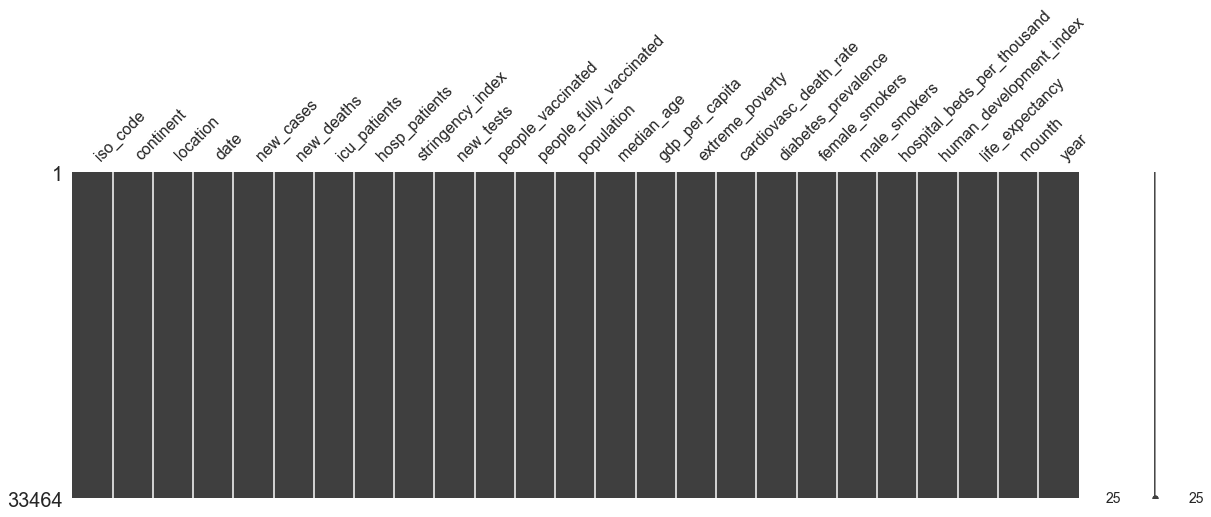

In [69]:
mno.matrix(dfeurope, figsize = (20, 6))

##  <font color='blue'> Mapa de Correlacao </font>

In [70]:
corr_dfeurope = dfeurope.corr()

In [71]:
corr_dfeurope

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,year
new_cases,1.000000,0.346012,0.366782,0.378964,0.087521,0.498335,0.501399,0.526340,0.348571,0.064214,-0.048299,-0.015441,-0.081854,-0.073106,0.039321,-0.014584,0.018226,0.098810,0.024931,0.243986
new_deaths,0.346012,1.000000,0.485349,0.508503,0.219763,0.245998,0.315051,0.293222,0.608703,0.058759,-0.116370,-0.003794,0.074478,-0.059658,0.022735,0.127368,0.123073,0.007341,-0.141640,0.058668
icu_patients,0.366782,0.485349,1.000000,0.674870,0.319485,0.307770,0.319821,0.290864,0.444157,0.204268,-0.040515,0.106894,-0.249262,-0.051323,0.134383,-0.117642,0.022183,0.221010,0.179093,0.044263
hosp_patients,0.378964,0.508503,0.674870,1.000000,0.269100,0.407439,0.229280,0.208610,0.348194,0.135123,-0.079556,0.025471,-0.197005,-0.170394,0.103256,-0.116180,-0.045436,0.132487,0.124660,0.053633
stringency_index,0.087521,0.219763,0.319485,0.269100,1.000000,0.115714,0.052305,0.030879,0.190598,0.091110,-0.044580,0.074596,-0.138769,0.024473,0.054984,0.006004,-0.056574,0.070265,0.095313,-0.200014
new_tests,0.498335,0.245998,0.307770,0.407439,0.115714,1.000000,0.531256,0.494745,0.425347,0.050124,-0.049201,-0.064501,-0.186149,-0.184894,0.019913,-0.088127,-0.079462,0.175716,0.087012,0.170447
people_vaccinated,0.501399,0.315051,0.319821,0.229280,0.052305,0.531256,1.000000,0.974732,0.533934,0.103368,-0.051429,-0.026590,-0.119494,-0.099327,0.046424,-0.020491,0.031292,0.145392,0.044305,0.263756
people_fully_vaccinated,0.526340,0.293222,0.290864,0.208610,0.030879,0.494745,0.974732,1.000000,0.493858,0.105151,-0.052277,-0.005401,-0.106868,-0.078694,0.044872,-0.016709,0.035594,0.131762,0.037985,0.269147
population,0.348571,0.608703,0.444157,0.348194,0.190598,0.425347,0.533934,0.493858,1.000000,0.107559,-0.152812,-0.045247,0.036600,-0.103003,0.031089,0.150911,0.185691,0.095664,-0.149404,-0.016538
median_age,0.064214,0.058759,0.204268,0.135123,0.091110,0.050124,0.103368,0.105151,0.107559,1.000000,0.290228,0.098060,-0.159026,-0.066157,0.242001,-0.066562,0.295327,0.168479,0.344196,-0.034620


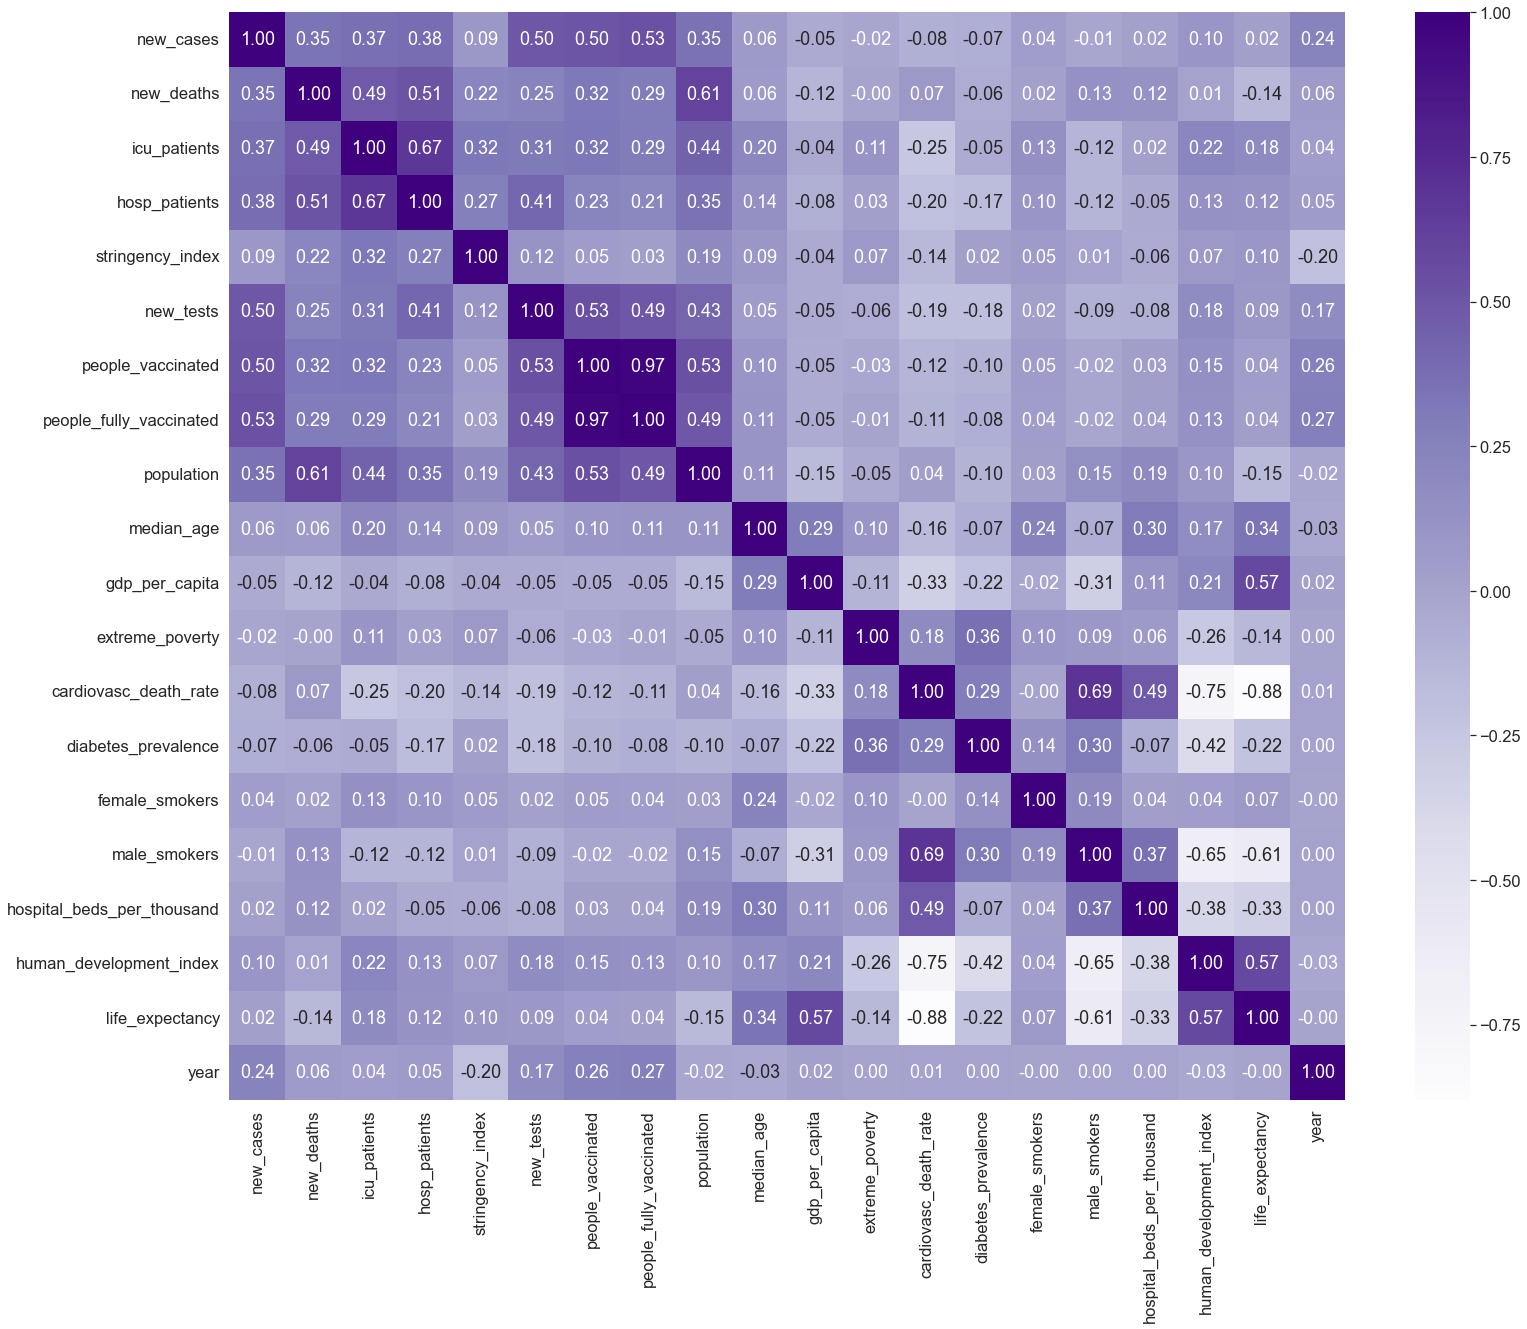

In [72]:
plt.figure(figsize = (25, 20))
sns.heatmap(dfeurope.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

## <font color='blue'> Verificando os outliers das variaveis numericas </font>

In [73]:
dfeurope.shape

(33464, 25)

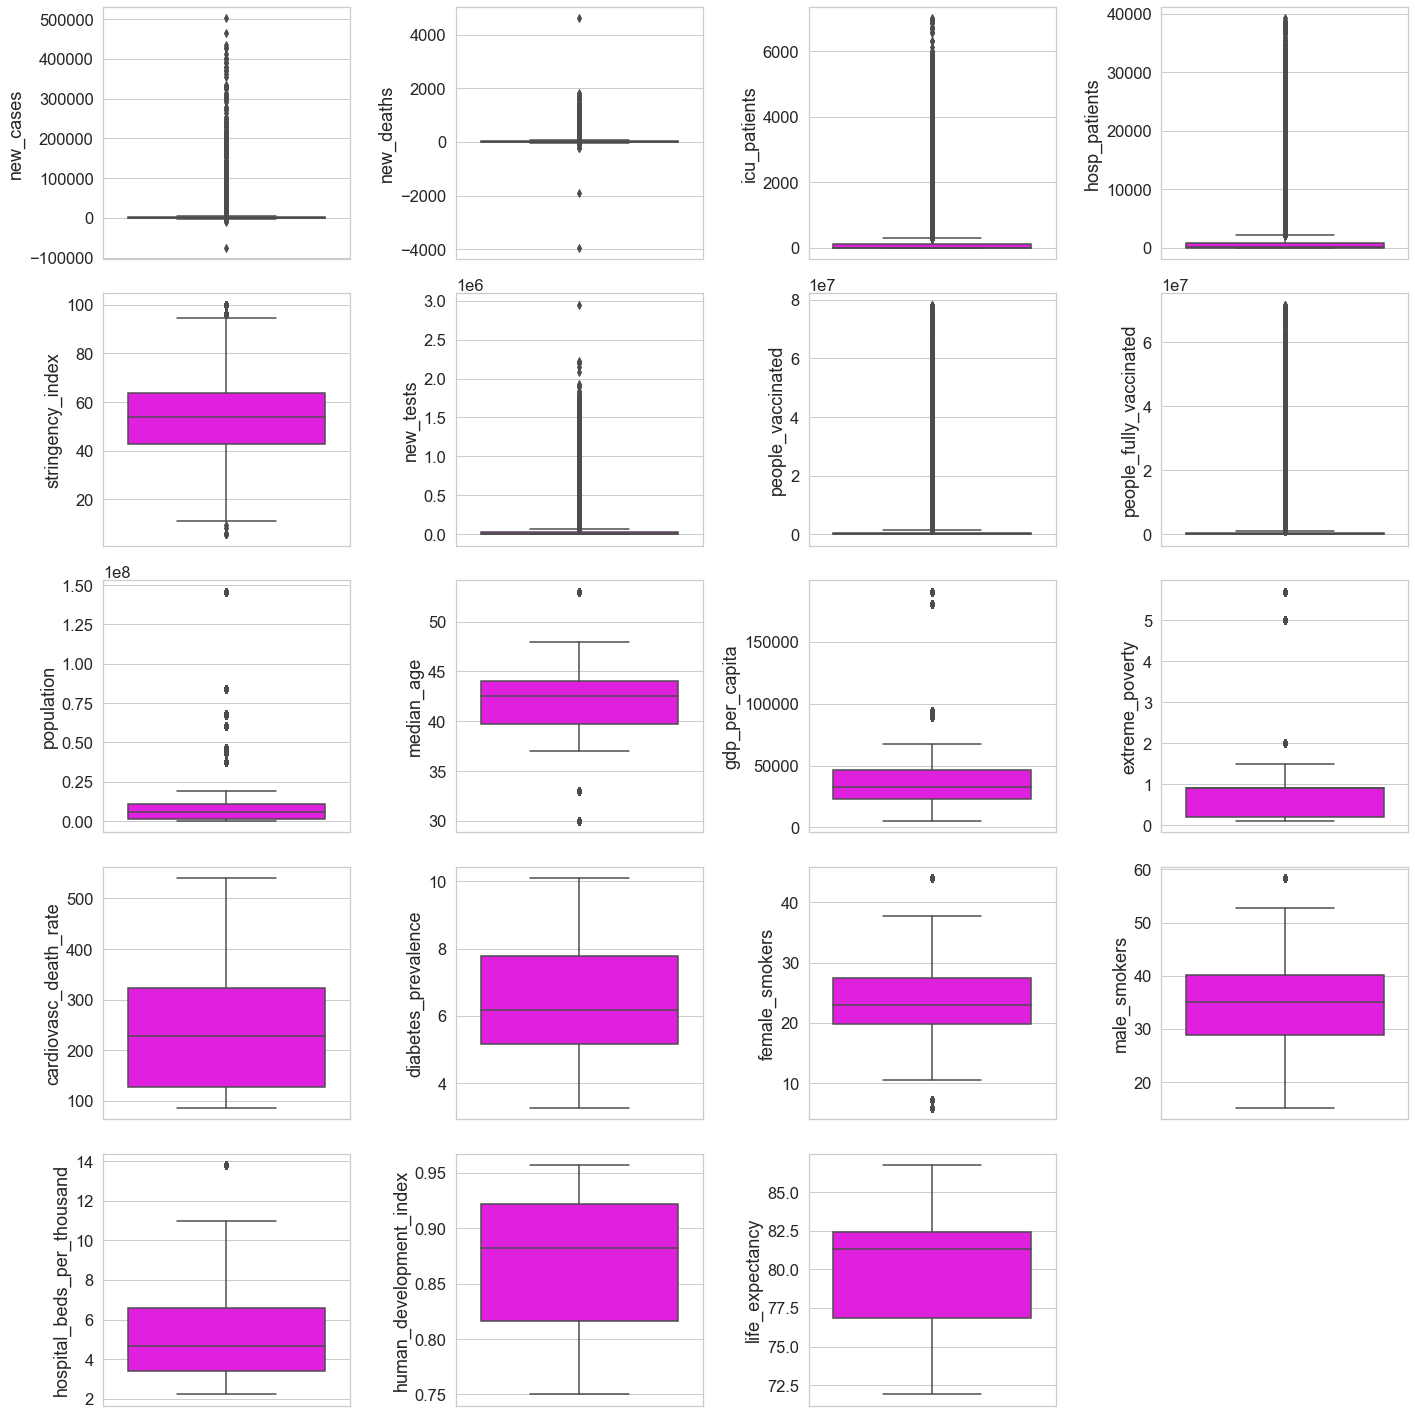

In [74]:
features = nums
plt.figure(figsize = (20, 20))
for i in range(0, len(features)):
    plt.subplot(5, len(features)/4, i + 1)
    sns.boxplot(y = dfeurope[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

In [75]:
new_deaths = dfeurope[dfeurope['new_deaths'] < 0]

In [76]:
new_deaths.shape

(78, 25)

In [77]:
dfeurope.loc[dfeurope['new_deaths'] < 0, 'new_deaths'] = 0
dfeurope.loc[dfeurope['new_cases'] < 0, 'new_cases'] = 0

In [78]:
dfeurope.describe()

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,year
count,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,3.346400e+04,3.346400e+04,3.346400e+04,3.346400e+04,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000,33464.000000
mean,4578.634831,50.832148,254.590396,1693.336421,53.736074,5.336600e+04,3.168993e+06,2.654365e+06,1.605334e+07,42.047992,42264.499313,0.902134,229.321376,6.546103,23.344409,35.460041,5.141942,0.871264,79.868161,2020.675203
std,18068.071903,138.840128,720.417050,4736.246361,15.713054,1.594842e+05,1.036603e+07,9.059426e+06,2.792702e+07,3.633179,35915.237002,1.015238,116.446976,1.919551,6.986744,9.691570,2.261628,0.058978,3.477177,0.609245
min,0.000000,0.000000,0.000000,0.000000,5.560000,0.000000e+00,0.000000e+00,0.000000e+00,3.369100e+04,30.000000,5189.972000,0.100000,86.060000,3.280000,5.900000,15.200000,2.220000,0.750000,71.900000,2020.000000
25%,36.000000,0.000000,0.000000,0.000000,42.590000,0.000000e+00,0.000000e+00,0.000000e+00,1.325188e+06,39.700000,23313.199000,0.200000,126.459000,5.180000,19.800000,28.900000,3.390000,0.816000,76.880000,2020.000000
50%,402.000000,5.000000,0.000000,39.000000,53.700000,4.986000e+03,0.000000e+00,0.000000e+00,5.465629e+06,42.500000,32605.906000,0.900000,227.485000,6.180000,23.000000,35.000000,4.690000,0.882000,81.320000,2021.000000
75%,2268.250000,30.000000,119.000000,843.250000,63.890000,2.861250e+04,5.691608e+05,4.407318e+05,1.072455e+07,44.000000,46682.515000,0.900000,322.688000,7.770000,27.400000,40.200000,6.560000,0.922000,82.400000,2021.000000
max,502507.000000,4614.000000,7019.000000,39255.000000,100.000000,2.945871e+06,7.828428e+07,7.160191e+07,1.459120e+08,53.000000,190512.000000,5.700000,539.849000,10.080000,44.000000,58.300000,13.800000,0.957000,86.750000,2022.000000


In [79]:
dfeurope.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy', 'mounth', 'year'],
      dtype='object')

## <font color='blue'> Removendo Outliers </font>

In [80]:
registros = np.array([True] * len(dfeurope))

In [81]:
np.count_nonzero(registros == True)

33464

In [82]:
np.count_nonzero(registros == False)

0

In [83]:
nums2 = ['new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy']

In [84]:
for col in nums2:
    
  
    zscore = abs(stats.zscore(dfeurope[col])) 
    

    registros = (zscore < 3) & registros

In [85]:
dfeurope = dfeurope[registros] 

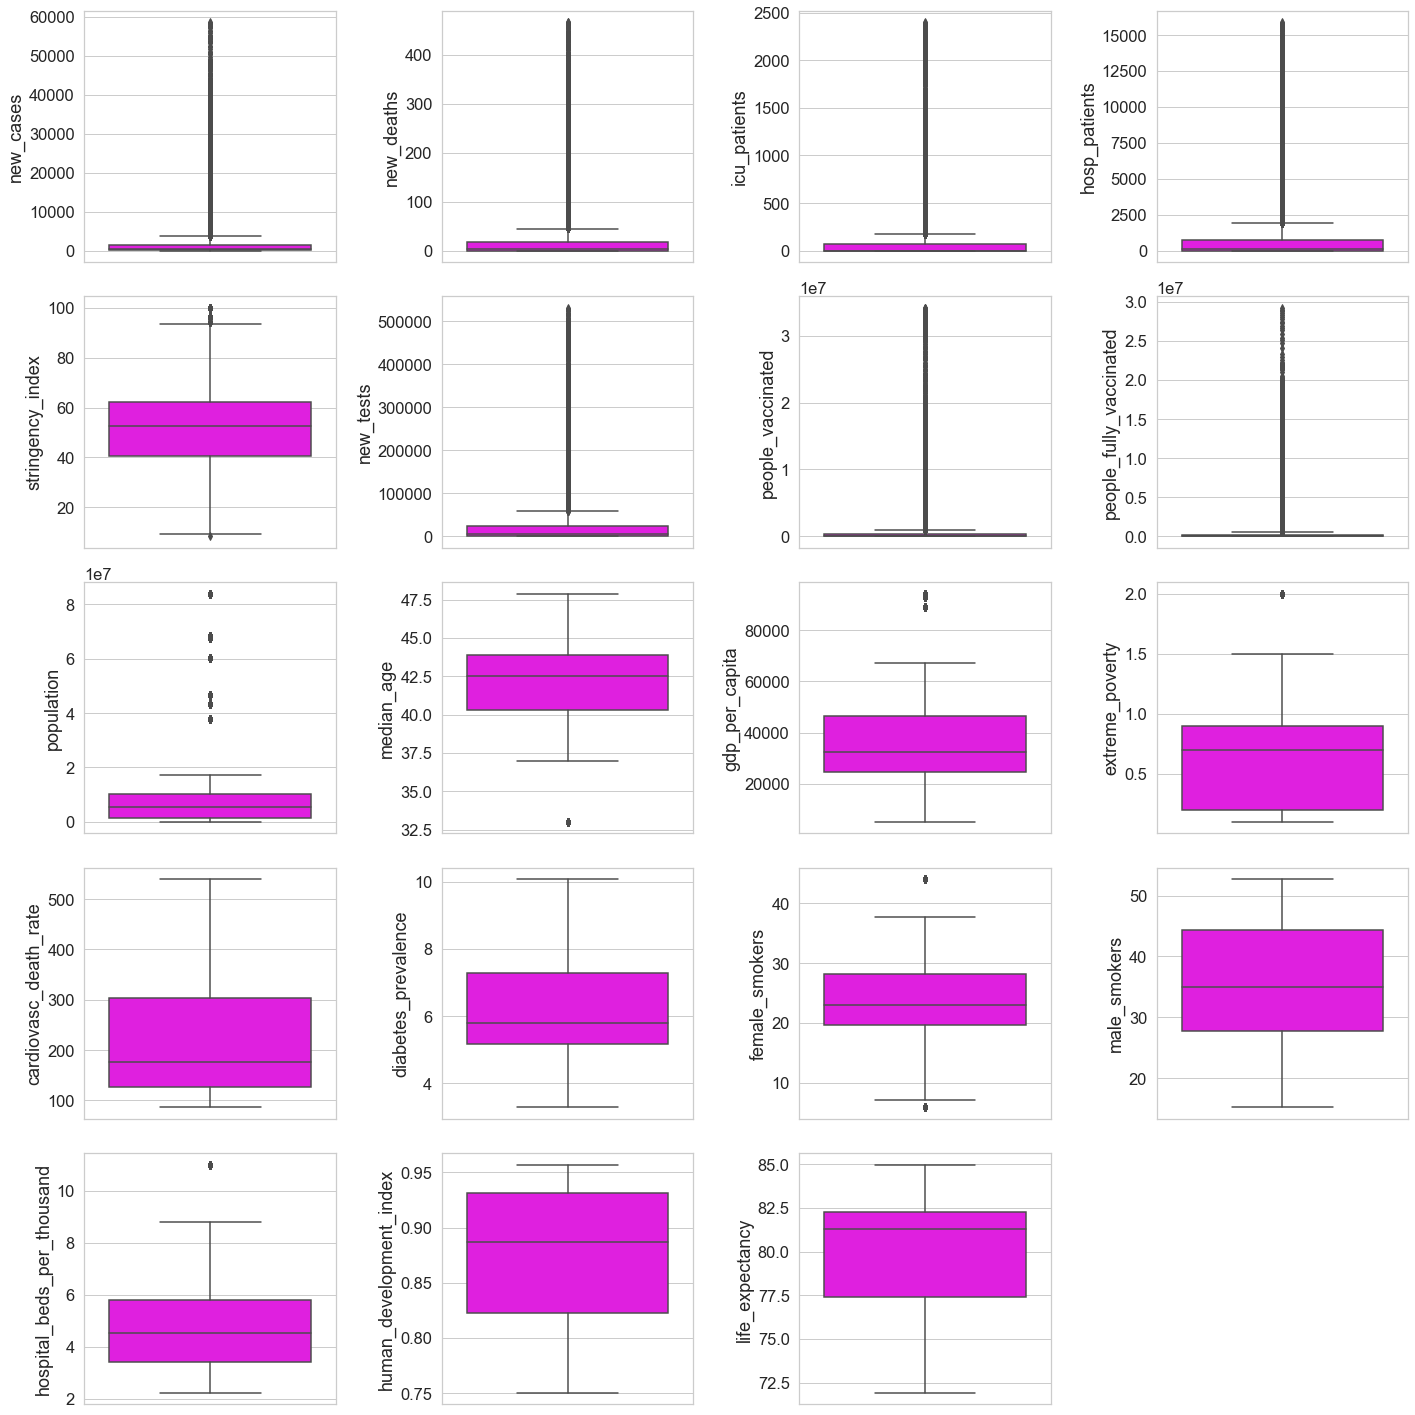

In [86]:
features = nums
plt.figure(figsize = (20, 20))
for i in range(0, len(features)):
    plt.subplot(5, len(features)/4, i + 1)
    sns.boxplot(y = dfeurope[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

In [87]:
dfeurope.describe()

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,year
count,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,2.660900e+04,2.660900e+04,2.660900e+04,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000,26609.000000
mean,2001.105979,21.853283,111.583487,928.645458,52.488749,26447.639859,1.027423e+06,8.547532e+05,9.508947e+06,41.966635,37850.637126,0.690578,227.267592,6.453521,23.253828,35.292232,4.905033,0.874776,79.846394,2020.650945
std,5066.175793,49.446726,281.289898,2037.608873,15.695988,57839.403743,3.093699e+06,2.511068e+06,1.501136e+07,2.830121,21427.801543,0.383843,117.719647,1.913889,7.688531,10.005533,1.851914,0.058629,3.284017,0.606699
min,0.000000,0.000000,0.000000,0.000000,8.330000,0.000000,0.000000e+00,0.000000e+00,3.369100e+04,33.000000,5189.972000,0.100000,86.060000,3.280000,5.900000,15.200000,2.220000,0.750000,71.900000,2020.000000
25%,37.000000,0.000000,0.000000,0.000000,40.740000,0.000000,0.000000e+00,0.000000e+00,1.325188e+06,40.300000,24574.382000,0.200000,126.459000,5.180000,19.600000,27.800000,3.400000,0.823000,77.400000,2020.000000
50%,342.000000,3.000000,0.000000,80.000000,52.780000,5841.000000,0.000000e+00,0.000000e+00,5.449270e+06,42.500000,32605.906000,0.700000,175.695000,5.810000,23.000000,35.000000,4.530000,0.887000,81.320000,2021.000000
75%,1505.000000,18.000000,69.000000,770.000000,62.040000,23903.000000,3.749930e+05,2.223880e+05,1.016016e+07,43.900000,46682.515000,0.900000,304.195000,7.290000,28.200000,44.400000,5.800000,0.931000,82.280000,2021.000000
max,58616.000000,466.000000,2399.000000,15887.000000,100.000000,530626.000000,3.419697e+07,2.922128e+07,8.390047e+07,47.900000,94277.965000,2.000000,539.849000,10.080000,44.000000,52.700000,11.000000,0.957000,84.970000,2022.000000


## <font color='blue'> Feature Selection </font>

Aqui sera tomado as decisões sobre quais variáveis serão usadas no modelo preditivo com base no mapa da correlação

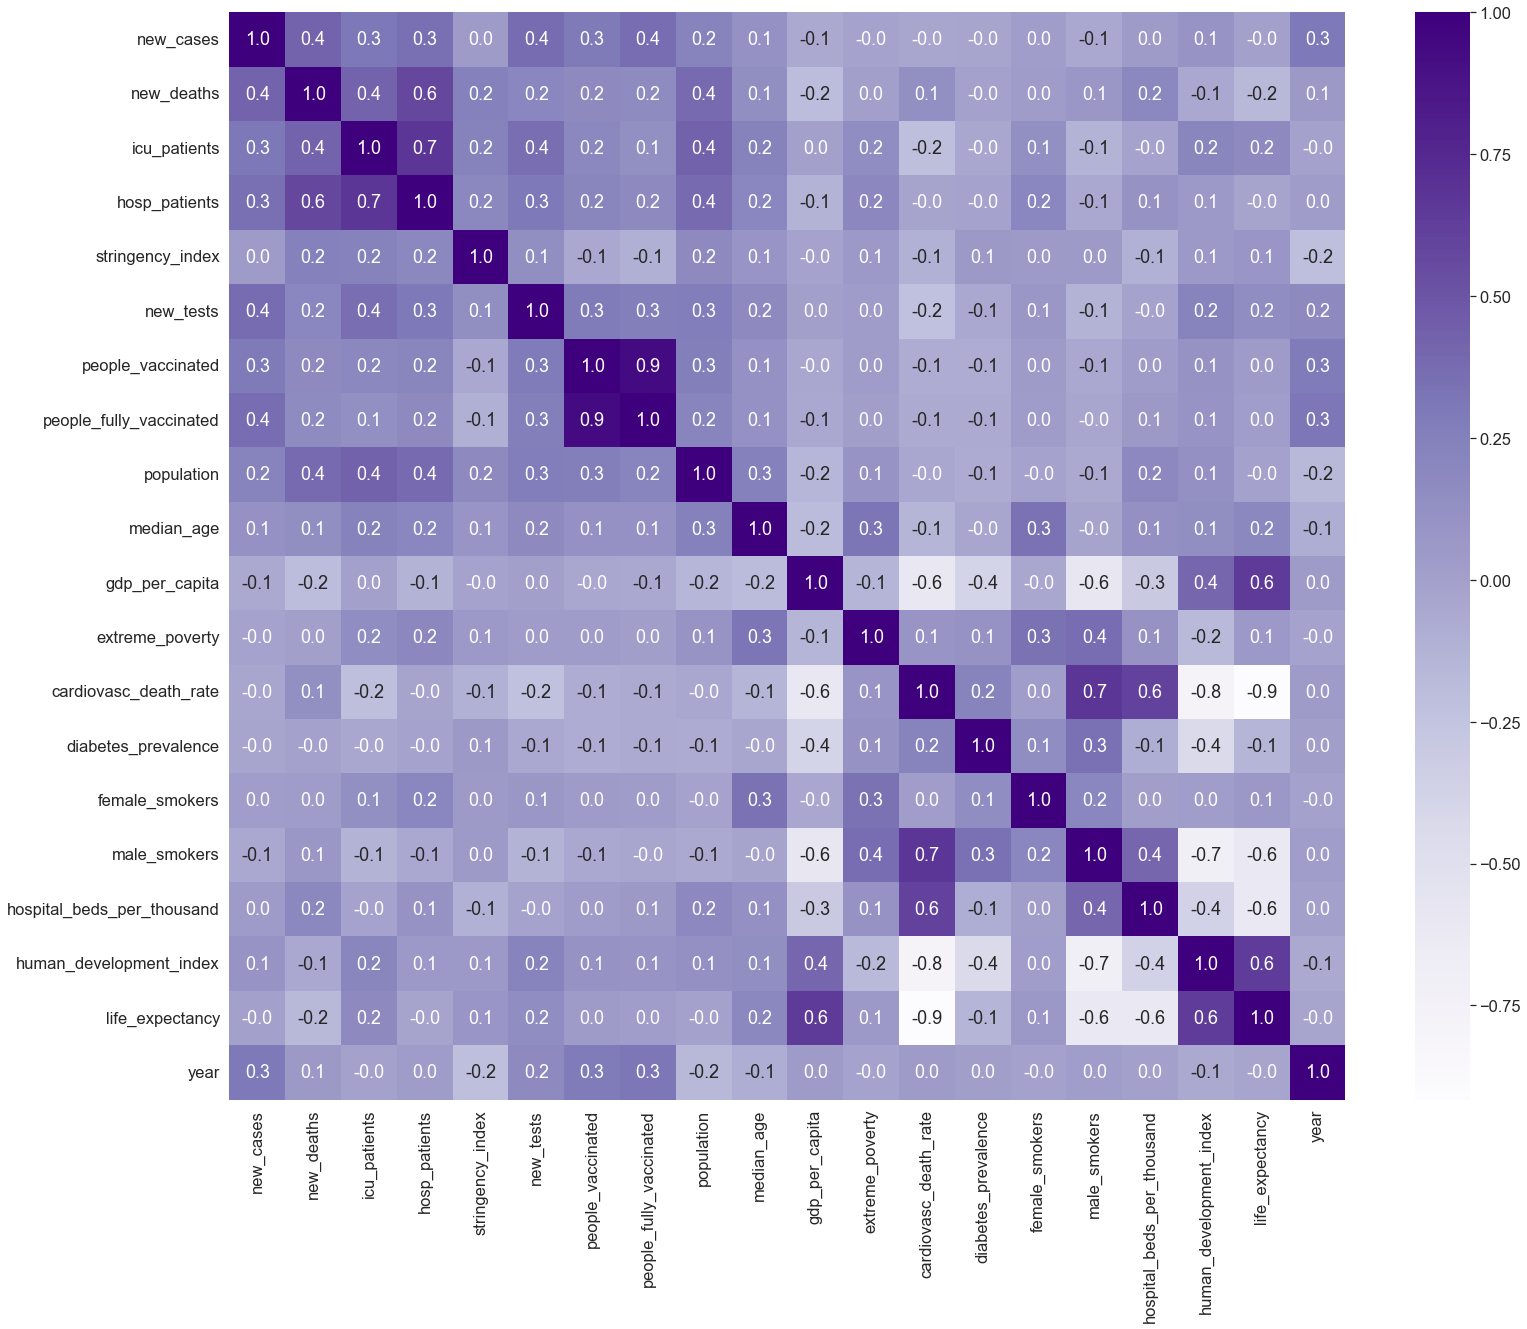

In [88]:
plt.figure(figsize = (25, 20))
sns.heatmap(dfeurope.corr(), cmap = 'Purples', annot = True, fmt = '.1f');

Cria uma cópia do dataframe

In [89]:
df_europe = dfeurope.copy()

In [90]:
df_europe.sample(10)

,iso_code,continent,location,date,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,mounth,year
119025,POL,Europe,Poland,2020-04-25,381.0,30.0,0.0,2821.0,83.33,0.0,...,0.9,227.331,5.91,23.3,33.1,6.620,0.880,78.73,April,2020
68483,ISL,Europe,Iceland,2021-10-06,45.0,0.0,0.0,9.0,30.56,1751.0,...,0.2,117.992,5.31,14.3,15.2,2.910,0.949,82.99,October,2021
119173,POL,Europe,Poland,2020-09-20,910.0,11.0,0.0,1985.0,23.15,18604.0,...,0.9,227.331,5.91,23.3,33.1,6.620,0.880,78.73,September,2020
139299,ESP,Europe,Spain,2021-06-17,4197.0,19.0,793.0,2038.0,50.46,94435.0,...,1.0,99.403,7.17,27.4,31.4,2.970,0.904,83.56,June,2021
89474,LUX,Europe,Luxembourg,2021-12-20,921.0,5.0,19.0,70.0,46.30,3196.0,...,0.2,128.275,4.42,20.9,26.0,4.510,0.916,82.25,December,2021
130432,SRB,Europe,Serbia,2021-04-28,2138.0,26.0,161.0,4987.0,56.48,13832.0,...,0.9,439.415,10.08,37.7,40.2,5.609,0.806,76.00,April,2021
39026,CZE,Europe,Czechia,2021-08-15,142.0,0.0,16.0,61.0,28.70,67851.0,...,0.9,227.485,6.82,30.5,38.3,6.630,0.900,79.38,August,2021
68309,ISL,Europe,Iceland,2021-04-15,4.0,0.0,0.0,3.0,47.22,736.0,...,0.2,117.992,5.31,14.3,15.2,2.910,0.949,82.99,April,2021
142568,CHE,Europe,Switzerland,2020-05-19,21.0,3.0,67.0,230.0,58.33,0.0,...,0.9,99.739,5.59,22.6,28.9,4.530,0.955,83.78,May,2020
133749,SVK,Europe,Slovakia,2021-09-19,916.0,0.0,33.0,282.0,36.11,16324.0,...,0.7,287.959,7.29,23.1,37.7,5.820,0.860,77.54,September,2021


In [91]:
df_europe['year'] = np.where(
        (df_europe['year'] == 2020), "0", 
    np.where(
        (df_europe['year'] == 2021), "1", 
    np.where(
        (df_europe['year'] == 2022), "2" , 'x')))

In [92]:
df_europe['mounth'].value_counts()

July         2414
August       2404
June         2385
May          2384
October      2369
September    2318
January      2232
December     2226
April        2166
November     2125
February     1826
March        1760
Name: mounth, dtype: int64

In [93]:
df_europe['mounth'] = np.where(
        (df_europe['mounth'] == 'January'), "1", 
    np.where(
        (df_europe['mounth'] == 'February'), "2", 
    np.where(
        (df_europe['mounth'] == 'March'), "3" ,
        np.where(
        (df_europe['mounth'] == 'April'), "4" ,
            np.where(
        (df_europe['mounth'] == 'May'), "5" ,
                np.where(
        (df_europe['mounth'] == 'June'), "6" ,
                    np.where(
        (df_europe['mounth'] == 'July'), "7" ,
                         np.where(
        (df_europe['mounth'] == 'August'), "8" ,
                        np.where(
        (df_europe['mounth'] == 'September'), "9" ,
                            np.where(
        (df_europe['mounth'] == 'October'), "10" ,
                                np.where(
        (df_europe['mounth'] == 'November'), "11" ,'12')))))))))))

In [94]:
df_europe.sample(10)

,iso_code,continent,location,date,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,mounth,year
73185,IMN,Europe,Isle of Man,2020-08-14,0.0,0.0,0.0,0.0,53.70,0.0,...,0.9,229.000,6.50,23.0,35.0,5.00,0.800,81.40,8,0
118994,POL,Europe,Poland,2020-03-25,150.0,4.0,0.0,0.0,57.41,0.0,...,0.9,227.331,5.91,23.3,33.1,6.62,0.880,78.73,3,0
59425,GRC,Europe,Greece,2021-10-08,2277.0,27.0,0.0,0.0,80.09,201746.0,...,1.5,175.695,4.55,35.3,52.0,4.21,0.888,82.24,10,1
14725,BEL,Europe,Belgium,2020-06-25,109.0,4.0,38.0,256.0,51.85,15202.0,...,0.2,114.898,4.29,25.1,31.4,5.64,0.931,81.63,6,0
40051,DNK,Europe,Denmark,2020-05-31,36.0,3.0,20.0,85.0,60.19,7648.0,...,0.2,114.767,6.41,19.3,18.8,2.50,0.940,80.90,5,0
134379,SVN,Europe,Slovenia,2021-05-20,358.0,7.0,111.0,362.0,52.78,4136.0,...,0.9,153.493,7.25,20.1,25.0,4.50,0.917,81.32,5,1
38376,CYP,Europe,Cyprus,2021-10-28,200.0,0.0,10.0,59.0,46.30,24193.0,...,0.9,141.171,9.24,19.6,52.7,3.40,0.887,80.98,10,1
52824,FIN,Europe,Finland,2021-08-09,537.0,0.0,16.0,93.0,38.43,17552.0,...,0.9,153.507,5.76,18.3,22.6,3.28,0.938,81.91,8,1
82746,LVA,Europe,Latvia,2021-04-19,202.0,3.0,0.0,620.0,56.48,2683.0,...,0.7,350.060,4.91,25.6,51.0,5.57,0.866,75.29,4,1
105796,NLD,Europe,Netherlands,2021-11-23,22960.0,53.0,488.0,2052.0,52.78,104109.0,...,0.9,109.361,5.29,24.4,27.3,3.32,0.944,82.28,11,1


In [95]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy', 'mounth', 'year'],
      dtype='object')

In [96]:
 # Escolhendo as variaveis numericas para o pre-processsamento
df_europe = df_europe [['new_cases', 'new_deaths',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'human_development_index',
       'life_expectancy', 'mounth', 'year']]

## <font color='blue'> Pré-Processamento de Dados </font>

O objetivo do Pré-processamento é deixar os dados no formato ideal para a próxima etapa dentro de um projeto de Ciência de Dados. Normalmente o Pré-processamento é a última etapa antes de treinar um modelo de Machine Learning.

Algumas técnicas de Pré-processamento devem ser aplicadas exclusivamente nos dados de treino

In [97]:
df_europe.dtypes

new_cases                     float64
new_deaths                    float64
icu_patients                  float64
hosp_patients                 float64
stringency_index              float64
new_tests                     float64
people_vaccinated             float64
people_fully_vaccinated       float64
population                    float64
median_age                    float64
gdp_per_capita                float64
extreme_poverty               float64
cardiovasc_death_rate         float64
diabetes_prevalence           float64
female_smokers                float64
male_smokers                  float64
hospital_beds_per_thousand    float64
human_development_index       float64
life_expectancy               float64
mounth                         object
year                           object
dtype: object

In [98]:
df_europe.sample(10)

,new_cases,new_deaths,icu_patients,hosp_patients,stringency_index,new_tests,people_vaccinated,people_fully_vaccinated,population,median_age,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,human_development_index,life_expectancy,mounth,year
87241,1720.0,23.0,0.0,1188.0,46.30,8633.0,1890349.0,1804867.0,2689862.0,43.5,...,0.7,342.989,3.67,21.3,38.0,6.560,0.882,75.93,12,1
67501,1344.0,93.0,0.0,3854.0,72.22,17238.0,145257.0,8135.0,9634162.0,43.4,...,0.5,278.296,7.55,26.8,34.8,7.020,0.854,76.88,1,1
50598,7.0,0.0,0.0,0.0,41.67,0.0,33373.0,25470.0,49053.0,37.0,...,0.9,229.000,6.50,23.0,35.0,5.000,0.800,80.67,7,1
20253,2577.0,23.0,0.0,0.0,50.00,0.0,0.0,0.0,3263459.0,42.5,...,0.2,329.635,10.08,30.2,47.7,3.500,0.780,77.40,1,2
73346,0.0,0.0,0.0,0.0,53.70,0.0,0.0,0.0,85410.0,43.0,...,0.9,229.000,6.50,23.0,35.0,5.000,0.800,81.40,1,1
72893,1057.0,0.0,59.0,308.0,40.74,21023.0,3804698.0,3721646.0,4982904.0,38.7,...,0.2,126.459,3.28,23.0,25.7,2.960,0.955,82.30,10,1
59273,1427.0,51.0,0.0,0.0,71.30,22869.0,0.0,0.0,10370747.0,45.3,...,1.5,175.695,4.55,35.3,52.0,4.210,0.888,82.24,5,1
52494,40.0,0.0,0.0,0.0,32.41,8400.0,0.0,0.0,5548361.0,42.8,...,0.9,153.507,5.76,18.3,22.6,3.280,0.938,81.91,9,0
23542,3389.0,208.0,781.0,8309.0,48.15,13427.0,556719.0,160221.0,6896655.0,44.7,...,1.5,424.688,5.81,30.1,44.4,7.454,0.816,75.05,4,1
3100,0.0,0.0,0.0,0.0,41.67,0.0,0.0,0.0,77354.0,46.0,...,0.9,109.135,7.97,29.0,37.8,5.000,0.868,83.73,8,0


Variáveis de entrada (variáveis preditoras)

In [99]:
X = df_europe[['new_cases',
       'icu_patients', 'hosp_patients', 'stringency_index', 'new_tests',
       'people_vaccinated', 'population',
       'median_age', 'cardiovasc_death_rate',
       'male_smokers', 'human_development_index',
       'life_expectancy', 'year']]

Variável de saída (variável alvo ou target)

In [100]:
y = df_europe[['new_deaths']]

Divisão em dados de treino e teste

In [101]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [102]:
len(X_treino)

18626

In [103]:
len(X_teste)

7983

## <font color='blue'> Padronização </font>

In [104]:
scaler = StandardScaler()

In [105]:
scaler.fit(X_treino)

StandardScaler()

In [106]:
X_treino = scaler.transform(X_treino)

In [107]:
X_teste = scaler.transform(X_teste)

In [108]:
X_treino[:5]

array([[ 0.0441163 ,  0.33289474, -0.04817318, -0.04061416,  7.81859315,
        -0.32852961, -0.03046045,  0.86215726, -0.69860537, -0.44128978,
         0.80763806,  0.5157128 ,  0.5803858 ],
       [-0.39194779, -0.39593756, -0.45501951, -0.86842373, -0.45372241,
        -0.32852961, -0.62775087, -1.75213558,  0.01393666, -0.0317276 ,
        -1.27168019,  0.25106422,  0.5803858 ],
       [ 0.37820726, -0.39593756,  0.03339383, -0.39511595, -0.27970573,
         0.30092396, -0.45237545,  0.54420272,  0.9829758 ,  0.26795205,
         0.12589437, -1.19081424,  2.23156432],
       [-0.17847874,  1.25295533,  1.53323801, -0.15878142, -0.45372241,
        -0.32852961, -0.17300344,  0.9681421 ,  1.67751236,  0.90726862,
        -0.99898272, -1.45850476,  2.23156432],
       [-0.39075744, -0.39593756, -0.45501951,  2.02954852, -0.43428355,
        -0.32852961,  0.05771009,  1.18011179, -0.43921787,  1.66645706,
         0.22815592,  0.72864843, -1.07079273]])

In [109]:
X_teste[:5]

array([[-0.31437679, -0.15419615,  0.47385565,  0.25512337, -0.28217662,
         0.44274236, -0.17467085, -0.26834775,  1.802709  ,  0.48771712,
        -1.16941864, -1.16952068,  0.5803858 ],
       [-0.11003374, -0.39593756, -0.45501951, -0.51392195, -0.45372241,
        -0.32852961, -0.41428302,  0.19091991,  0.86945126,  1.23691623,
        -1.61255204, -0.7436494 ,  0.5803858 ],
       [-0.39194779, -0.39593756, -0.45501951,  0.0775531 , -0.45372241,
        -0.32852961, -0.62533641,  0.36756131,  0.01393666, -0.0317276 ,
        -1.27168019,  0.47312567, -1.07079273],
       [ 0.24389634,  1.90962601,  0.35125797,  1.91138126,  0.12436341,
        -0.32852961,  0.50945215,  0.43821788, -1.00313405, -0.80090536,
         1.18259709,  0.74081619,  0.5803858 ],
       [-0.34770653, -0.32016786, -0.3853168 , -0.57268621,  0.33613469,
        -0.32852961, -0.57150501, -1.64615073, -0.73271204,  1.73638231,
         0.21111233,  0.34536429,  0.5803858 ]])

## <font color='blue'>  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Linear (Benchmark) </font>

Cria o modelo

In [110]:
modelo_v1 = LinearRegression()

Treinamento

In [111]:
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [112]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [[11.99408973  0.92365503 19.362308    8.24084841 -2.55869484 -0.23997669
   7.52480617  1.00557111  6.51202698 -1.09140504  0.2634347  -3.23309146
   1.34568199]]


Coeficientes das variáveis preditoras

In [113]:
df_coef = pd.DataFrame(modelo_v1.coef_.transpose(), X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
new_cases,11.994090
icu_patients,0.923655
hosp_patients,19.362308
stringency_index,8.240848
new_tests,-2.558695
people_vaccinated,-0.239977
population,7.524806
median_age,1.005571
cardiovasc_death_rate,6.512027
male_smokers,-1.091405


### Avaliação do Modelo

Previsões com dados de teste

In [114]:
pred_v1 = modelo_v1.predict(X_teste)

Imprime as 10 primeiras previsões

In [115]:
pred_v1[:10]

array([[43.56632752],
       [12.36531296],
       [ 2.19511778],
       [46.02502401],
       [-8.62032089],
       [-4.46656907],
       [15.71035683],
       [15.05734946],
       [37.40664732],
       [12.92515961]])

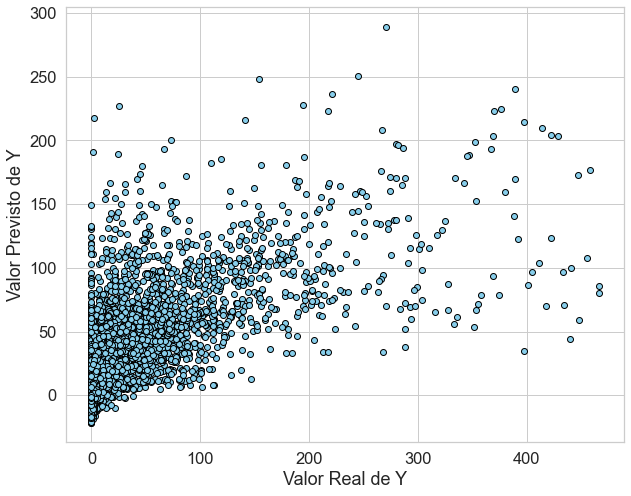

In [116]:
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

MAE - Erro Médio Absoluto

In [117]:
mean_absolute_error(y_teste, pred_v1)

18.390307459177176

MSE - Erro quadrático médio

In [118]:
mean_squared_error(y_teste, pred_v1)

1326.0611268058576

RMSE - Raiz quadrada do erro quadrático médio

In [119]:
np.sqrt(mean_squared_error(y_teste, pred_v1))

36.41512222697952

Coeficiente R2

In [120]:
r2_score(y_teste, pred_v1)

0.4810205258995146

Variância Explicada

In [121]:
explained_variance_score(y_teste, pred_v1)

0.48102053336978967

* Nosso modelo é caapz de explicar 48% da variância dos dados, o que é normal.

* O coeficiente R2 de 48% e as outras métricas. Será que pode-se melhorar essa performance?

### Resíduos

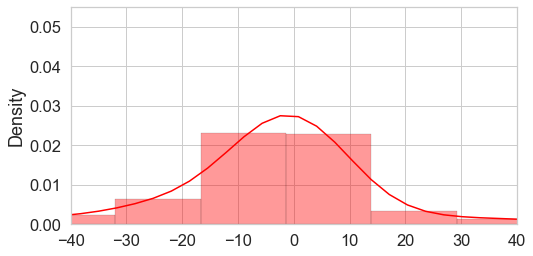

In [122]:
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## <font color='blue'> Construção, Treinamento e Avaliação do Modelo 2 com Regressão Ridge </font>

Cria o modelo

In [123]:
modelo_v2 = Ridge(alpha = 1.0)

Treinamento

In [124]:
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [125]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [[11.99356972  0.92494205 19.36057325  8.24034441 -2.55827814 -0.23976234
   7.52447393  1.00577648  6.50954183 -1.09131205  0.26246931 -3.23485247
   1.34553829]]


Coeficientes das variáveis preditoras

In [126]:
df_coef = pd.DataFrame(modelo_v2.coef_.transpose(), X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
new_cases,11.993570
icu_patients,0.924942
hosp_patients,19.360573
stringency_index,8.240344
new_tests,-2.558278
people_vaccinated,-0.239762
population,7.524474
median_age,1.005776
cardiovasc_death_rate,6.509542
male_smokers,-1.091312


Previsões com dados de teste

In [127]:
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([[43.56399262],
       [12.36656355],
       [ 2.19609683],
       [46.02557316],
       [-8.61858668],
       [-4.46465744],
       [15.71155969],
       [15.05748455],
       [37.40547148],
       [12.92670954]])

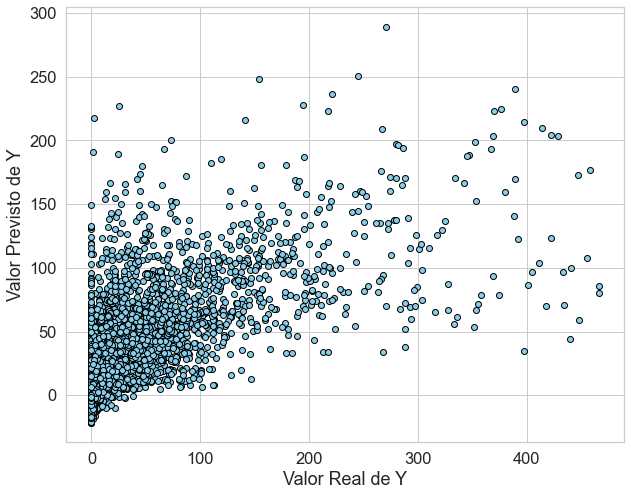

In [128]:
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [129]:
mean_absolute_error(y_teste, pred_v2)

18.390168771739653

In [130]:
mean_absolute_error(y_teste, pred_v2)

18.390168771739653

In [131]:
np.sqrt(mean_squared_error(y_teste, pred_v2))

36.41515524784985

In [132]:
r2_score(y_teste, pred_v2)

0.481019584688246

In [133]:
explained_variance_score(y_teste, pred_v2)

0.4810195921505538

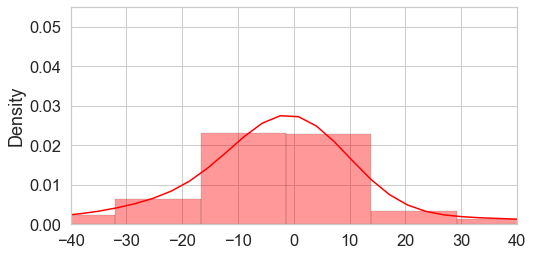

In [134]:
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## <font color='blue'> Seleção do Modelo </font>

* Os modelos 1 e 2 ficaram muito próximos e nesse caso devemos escolher o modelo mais simples, neste caso é o modelo 1.

## <font color='blue'> Interpretações dos Coeficientes: </font>

In [135]:
df_coef_final = pd.DataFrame(modelo_v1.coef_.transpose(), X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
new_cases,11.994090
icu_patients,0.923655
hosp_patients,19.362308
stringency_index,8.240848
new_tests,-2.558695
people_vaccinated,-0.239977
population,7.524806
median_age,1.005571
cardiovasc_death_rate,6.512027
male_smokers,-1.091405



* Mantendo todos os outros recursos fixos, o aumento de 1 unidade no número de Novos casos confirmados de COVID-19 está associado ao aumento de 11 mortes por covid 19 em media.


* Mantendo todos os outros recursos fixos, o aumento de 1 unidade no Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia está associado ao aumento de 1 morte por covid 19 em media.


* Mantendo todos os outros recursos fixos, o aumento de 1 unidade no Número de pacientes com COVID-19 no hospital em um determinado dia está associado ao aumento de 19 mortes por covid 19 em media.


* Mantendo todos os outros recursos fixos, o aumento de 1 unidade no Número de Novos testes para COVID-19 está associado a diminuicao de 2 mortes por covid 19 em media.


* Mantendo todos os outros recursos fixos, o aumento de 1 unidade no Número total de pessoas que receberam pelo menos uma dose de vacina está associado a 0 morte por covid 19 em media.


* Mantendo todos os outros recursos fixos, o aumento de 1 unidade no Número de População  está associado ao aumento de 7 mortes por covid 19 em media.


* Mantendo todos os outros recursos fixos, o aumento de 1 unidade na Taxa de mortalidade por doença cardiovascular está associado ao aumento de 6 mortes por covid 19 em media.


* Mantendo todos os outros recursos fixos, o aumento de 1 unidade na Proporção de homens que fumam está associado a diminuicao  de 1 morte por covid 19 em media.


* Mantendo todos os outros recursos fixos, o aumento de 1 unidade no Número do índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um padrão de vida decente está associado a 0 morte por covid 19 em media.

* Mantendo todos os outros recursos fixos, o aumento de 1 unidade  no Número do índice que mede a Expectativa de vida está associado a uma diminuicao de 3 morte por covid 19 em media.


##  <font color='blue'> O que tem influenciado o aumento do número de mortes por covid 19 no Continente Europeu:

A partir da análise dos coeficientes da Regressão linear, podemos afirmar que o aumento:
* Do número de novos casos de Covid;
* De pacientes com COVID-19 em unidades de terapia intensiva (UTIs);
* De pacientes com COVID-19 no hospital;
* De População do pais;
* Da Taxa de mortalidade por doença cardiovascular; 

Tem contribuído bastante para um aumento significativo no número de mortes por covid 19 na Europa.


Enquanto que um aumento 

* Do Número de Novos testes para COVID-19;
* De pessoas que receberam pelo menos uma dose de vacina;
* Do índice que mede a Expectativa de vida;
* Do índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um padrão de vida decente;

Contribuem para a diminuição no número  de mortes por covid 19.
